In [1]:
using Revise
using StatsPlots, UnROOT, StatsBase, Polynomials, LinearAlgebra, Printf
using FHist, MPThemes, DataFramesMeta, Distributions, LaTeXStrings 

In [2]:
ENV["COLUMNS"] = 2000
ENV["LINES"] = 20

20

Custom functions are placed in the MiscFuncs.jl file.

In [3]:
include("MiscFuncs.jl")
using .MiscFuncs

In [4]:
gr()
default(fmt = :jpg)
theme(
    :dao;
    size           = (1200, 800),
    legend         = :topleft,
    guidefontsize  = 20,
    tickfontsize   = 16,
    titlefontsize  = 20,
    legendfontsize = 20,
    left_margin    = 8Plots.mm,
    right_margin   = 8Plots.mm,
    top_margin     = 8Plots.mm,
    bottom_margin  = 6Plots.mm,
    dpi            = 200,
    :colorbar_titlefontsize => 16,
    widen = :false
);

In [5]:
baseDir = "/home/shoram/Work/PhD_Thesis/Job15/AngularCorrelations/"

"/home/shoram/Work/PhD_Thesis/Job15/AngularCorrelations/"

In [6]:
figDir = joinpath("/media/shoram/Extra SSD/CernBox/Work/Presentations/20221006_SuperNEMO_Analysis_Meeting/Figs")

"/media/shoram/Extra SSD/CernBox/Work/Presentations/20221006_SuperNEMO_Analysis_Meeting/Figs"

In [7]:
f = ROOTFile(
    baseDir*"AngularCorrelationAllEnergies96MilEvents.root",
);
tree = DataFrame(LazyTree(f, "tree", keys(f["tree"])));
f= nothing; # free file from memory with gc


### ``@transform`` adds a column ``:ESum`` to the ``tree`` which contains the sum of the electron energies

In [8]:
@transform! tree :ESum = :reconstructedEnergy2 + :reconstructedEnergy1;

### Initializing constants.

In [9]:

dEmitted = 1 # dθdif in degrees
nBins    = Int(180 / dEmitted)
minAngle = 0
maxAngle = 180
binWidth = maxAngle / nBins

minEnergy = 500
maxEnergy = 3500
dEnergy   = 500

xPts = minAngle:dEmitted:maxAngle-dEmitted

dϕ = dEmitted               # step in ϕ, if same as bin width
sign = "p"                  # sign in get_cut_edges function
maxSteps = Int(180 / dϕ)    # max number of steps (slices)

180

In [10]:
colors = [palette(:seaborn_bright)[i] for i in 1:length(palette(:seaborn_bright))];

The 2d Histogram of $\phi$ vs $\theta$ is defined to be $f(\theta,\phi)$. For each combination of $\phi$ and $\theta$, the bin number is obtained as corresponding value of $f(\theta,\phi)$.

In [11]:
rho(_cosdTheta) = 0.5 - 0.5 * _cosdTheta

# @transform! tree :weights = Weights(rho.(cosd.(:thetaEmitted))) # weights by pdf
@transform! tree :weights = 1                                     # unweighted



15747968×18 DataFrame
      Row │ momentumEmitted2x  reconstructedEnergy2  momentumEscaped1z  momentumEmitted1x  thetaEmitted  momentumEscaped1y  momentumEmitted1z  momentumEmitted1y  momentumEscaped2z  thetaEscaped  momentumEscaped2y  momentumEmitted2y  reconstructedEnergy1  momentumEscaped1x  momentumEmitted2z  momentumEscaped2x  ESum      weights 
          │ Float64            Float64               Float64            Float64            Float64       Float64            Float64            Float64            Float64            Float64       Float64            Float64            Float64               Float64            Float64            Float64            Float64   Int64   
──────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        1 │        0.723365                 604.269         -0.471071          -1.41249        89.6031           2.26532           -0.946003           2.12515          -0.155021         94.6325          0.351932           0.615735               2258.02           -1.36057           0.283402            0.777892  2862.28         1
        2 │       -1.87869                 1651.11           0.111843           0.620354       96.965           -0.427881           0.585939          -0.857937          0.547949        139.497          -0.460427          -0.935666                802.522           1.07408           0.0929118          -1.94376   2453.63         1
        3 │       -0.451873                 450.772         -0.204413           0.143294      154.233           -0.344668           0.461237          -0.617821         -0.00393392      138.388          -0.0885292          0.444109                425.001           0.557768         -0.51231            -0.766414   875.773        1
        4 │        0.00622859              2520.27           0.0712075         -0.27381        67.3403           0.440423          -0.0579716         -1.01549           0.518941        154.281          -2.14362           -1.34793                 659.761           0.717866          2.66656            -1.67234   3180.03         1
        5 │       -0.660664                 834.025         -0.282475          -1.77769        11.2133          -2.1054            -0.0196651         -1.94104           0.221755         53.0724         -0.966977          -1.05076                2170.29           -1.37587           0.0859927           0.291419  3004.32         1
        6 │       -0.44519                 1530.67           0.917931           0.0695716     168.417            1.51856            2.09515            0.648145         -1.07627          81.0901          0.0381113         -0.472476               1741.93           -0.999117         -1.86705            -1.51857   3272.61         1
    ⋮     │         ⋮                   ⋮                    ⋮                  ⋮               ⋮                ⋮                  ⋮                  ⋮                  ⋮               ⋮                ⋮                  ⋮                   ⋮                    ⋮                  ⋮                  ⋮             ⋮         ⋮
 15747964 │       -0.412094                 648.059          0.75043           -0.16305        96.6308           0.478557           1.48401           -0.755337         -0.333902         64.4923         -0.221978          -0.766064               1238.43           -1.19274          -0.570631           -0.76161   1886.49         1
 15747965 │       -0.502561                 895.556          0.0873355          1.04845        92.3844           1.64291           -0.412624           1.85675          -0.781149         80.0625         -0.229381          -0.0487258              1720.18            1.39812          -1.20927             0.585599  2615.74         1
 15747966 │       

Quantitative analysis - *the g(k) method*
===


Following the qualitative analysis presented above, a more quantitative approach will now be introduced. The goal of the so-called *g(k) method* is to quantitatively describe correlation between $\theta$ and $\phi$. This method is used for evaluation of proposed data-cuts. 

To derive the method, two figures are presented:
1. $f(\theta, \phi)$ - a 2D histogram with $\theta$ distribution on the x-axis and $\phi$ distribution on the y-axis
2. $g(k)$ - a 1D histogram with *so-called* $k$-line on the x-axis, where bin heights correspond to the integral over individual $k_i$ lines. $k$-lines are defined as diagonal lines in $f(\theta, \phi)$, fulfilling condition $k_i=\phi - \theta; (\phi - \theta) \in b_i$; binned as necessary, in general binning of $\Delta\phi = \Delta\theta = 1^{\circ}$ is used. 

## $f(\theta, \phi)$

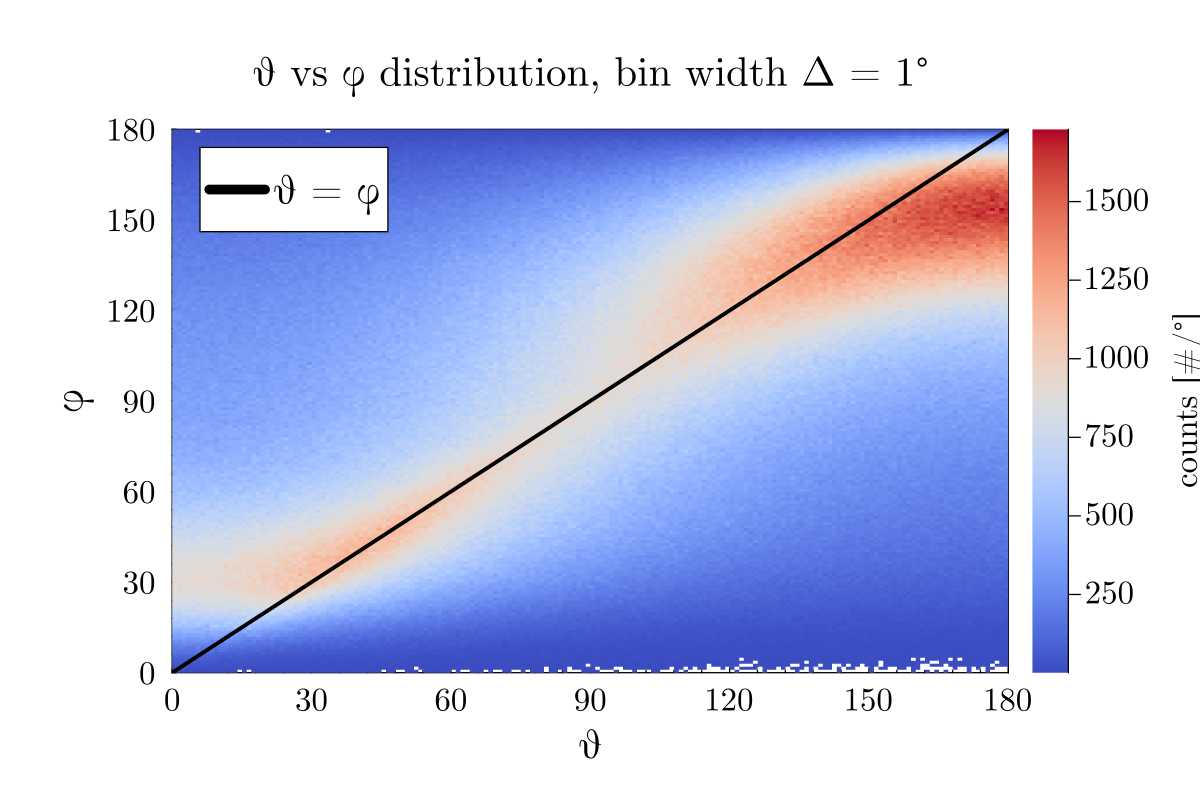

In [12]:
nBins = 180

h2d1 = histogram2d(
    tree.thetaEmitted,
    tree.thetaEscaped;
    nbins          = (nBins, nBins),
    xlabel         = "ϑ",
    ylabel         = "φ",
    legend         = :topright,
    title          = string("\nϑ vs φ distribution, bin width Δ = 1°"),
    lims           = (0, 180),
#     aspect_ratio   = 1,
    c              = :coolwarm,
    colorbar_title = "\ncounts [#/°]",
    thickness_scaling = 1.3,
    size= (1200,800)
)

plot!(y, c = :black, lw= 3, ls =:solid, label = "ϑ = φ", legend = :topleft)

In [13]:
savefig("Figs/2DThetaVsPhiAll.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/2DThetaVsPhiAll.pdf"

The correlation of $\theta$ and $\phi$ in $f(\theta, \phi)$ shows an S-shaped structure. There are two *hotspots* visible in the 2D histogram. First, a *smaller* hotspot is visible in the lower left quadrant of $f(\theta, \phi)$, here in-general $\phi > \theta$ - escape angles are overestimated over decay angles. The second *larger* hotspot is visible in the upper right quadrant of $f(\theta, \phi)$ where $\phi < \theta$ - escape angles are underestimed over decay angles. 

We can look more closely at the individual horizontal slices to view the $\theta$ distribution in each $\Delta\phi$. A few sample figures are shown. One can see that the $\theta$ distribution is very wide.

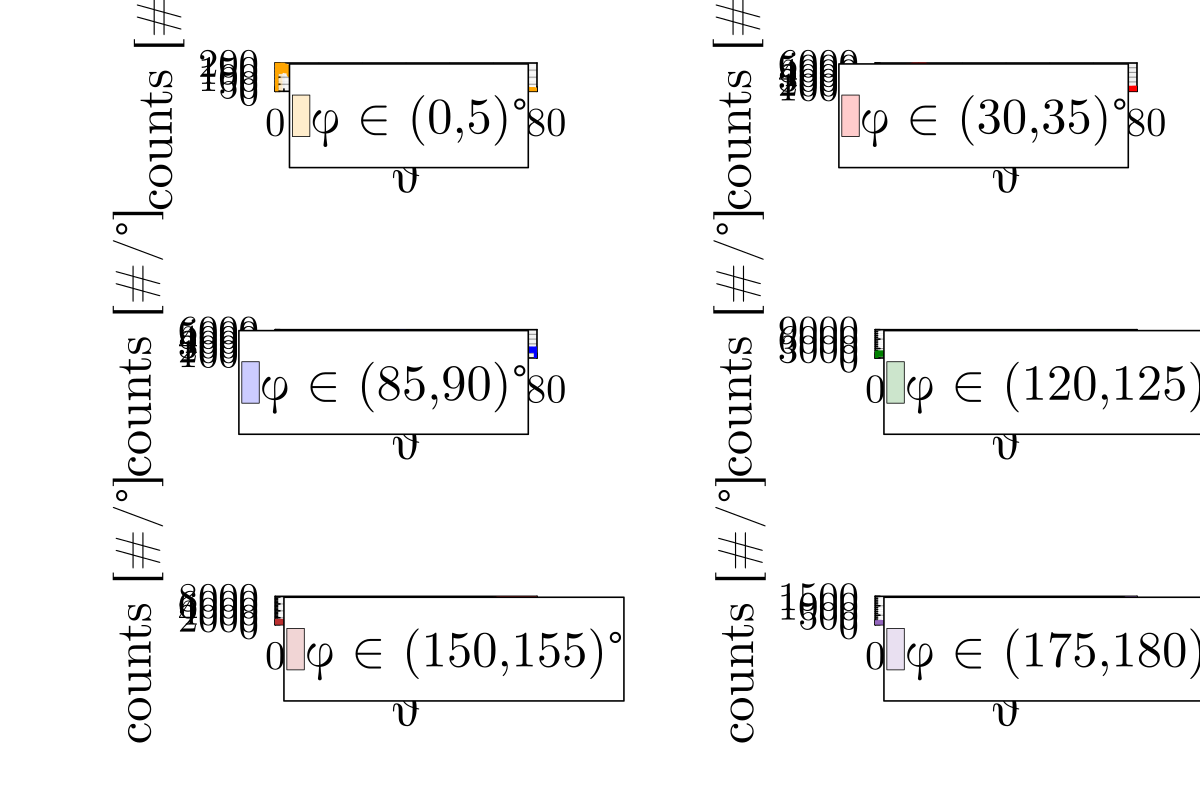

In [14]:
ts = 1.6
h1 = stephist(
    tree[ tree.thetaEscaped .< 5.0, :thetaEmitted ], 
    weights=tree[tree.thetaEscaped .< 5.0, :weights], label ="", c =:orange,
    ylabel = "counts [#/°]",
    legend = :topright, xlims = (0,180), ylims = (0, 200), 
    xlabel ="θ", lw = 4, nbins = 180, dpi = 200,
    thickness_scaling = ts
)
vspan!([0,5], alpha = 0.2, c =:orange, label = "φ ∈ (0,5)°" )

h2 = stephist( 
    tree[ 30 .< tree.thetaEscaped .< 35, :thetaEmitted ],
    ylabel = "counts [#/°]",
    weights=tree[30 .< tree.thetaEscaped .< 35, :weights],label ="", c =:red,
    legend = :topright, xlims = (0,180), ylims = (0, 6000), 
    xlabel ="θ", lw = 4, nbins = 180, dpi = 200,
    thickness_scaling = ts
    
)
vspan!([30,35], alpha = 0.2, c =:red, label = "φ ∈ (30,35)°" )

h3 = stephist( 
    tree[ 85 .< tree.thetaEscaped .< 90, :thetaEmitted ],
    weights=tree[85 .< tree.thetaEscaped .< 90, :weights], label ="", c =:blue,
    ylabel = "counts [#/°]",
    thickness_scaling = ts,
    legend = :topright, xlims = (0,180), ylims = (0, 6000), 
    xlabel ="θ", lw = 4, nbins = 180, dpi = 200 
)
vspan!([85,90], alpha = 0.2, c =:blue, label = "φ ∈ (85,90)°" )

h4 = stephist( 
    tree[ 120 .< tree.thetaEscaped .< 125, :thetaEmitted ],
    weights=tree[120 .< tree.thetaEscaped .< 125, :weights],label ="", c =:green, legend = :topleft,
    ylabel = "counts [#/°]",
    thickness_scaling = ts,
    xlims = (0,180), ylims = (0, 9000), 
    xlabel ="θ", lw = 4, nbins = 180, dpi = 200 
)
vspan!([120,125], alpha = 0.2, c =:green, label = "φ ∈ (120,125)°" )

h5 = stephist( 
    tree[ 150 .< tree.thetaEscaped .< 155, :thetaEmitted ],
    weights=tree[150 .< tree.thetaEscaped .< 155, :weights],label ="", c =5, legend = :topleft,
    ylabel = "counts [#/°]",
    thickness_scaling = ts,
    xlims = (0,180), 
    xlabel ="θ", lw = 4, nbins = 180, dpi = 200 
)
vspan!([150,155], alpha = 0.2, c =5, label = "φ ∈ (150,155)°" )


h6 = stephist( 
    tree[ 175 .< tree.thetaEscaped .< 180, :thetaEmitted ],
    weights=tree[175 .< tree.thetaEscaped .< 180, :weights],label ="", c =6, legend = :topleft,
    ylabel = "counts [#/°]",
    thickness_scaling = ts,
    xlims = (0,180), ylims = (0, 1500), 
    xlabel ="θ", lw = 4, nbins = 180, dpi = 200 
)
vspan!([175,180], alpha = 0.2, c =6, label = "φ ∈ (175,180)°" )

plot(h1, h2, h3, h4, h5, h6, layout = @layout [a b ; c d ; e f])



In [15]:
let hs = [h1, h2, h3, h4, h5, h6]
    for (i,h) in enumerate(hs)
        savefig(h, "Figs/Slice$i.pdf")
    end
    
end

Furthermore we can look even closer at each slice and calculate the statistical estimators. These will be used later in the analysis.

In [16]:
using Measures

In [17]:
function shaded_interval(thetas, lowerbound, upperbound, Δ = 5, binrange =(0:Δ:180); kwargs...)
    h = Hist1D(thetas, binrange)
    lowerQuantile = quantile(h, lowerbound)    # find the corresponding quantiles
    upperQuantile = quantile(h, upperbound)  

    minBinEdge = floor(lowerQuantile/Δ)*Δ+Δ  # find the upper edge of the bin with lower quantile
    maxBinEdge = floor(upperQuantile/Δ)*Δ  # find the lower edge of the bin with upper quantile
    binEdges = h.hist.edges[1][Int(binrange[1] + minBinEdge/Δ+1):Int(binrange[1] + maxBinEdge/Δ+1)] # get the binedges in between

    xvals = vcat(lowerQuantile, binEdges, upperQuantile)
    yvals = lookup.( h,  xvals) # find the binheights for the corresponding interval

    return plot( xvals, yvals, st =:step; kwargs... )
end

function shaded_interval!(p, thetas, lowerbound, upperbound, Δ = 5, binrange = (0:Δ:180); kwargs...)
    h = Hist1D(thetas, binrange)
    lowerQuantile = quantile(h, lowerbound)    # find the corresponding quantiles
    upperQuantile = quantile(h, upperbound)  

    minBinEdge = floor(lowerQuantile/Δ)*Δ+Δ  # find the upper edge of the bin with lower quantile
    maxBinEdge = floor(upperQuantile/Δ)*Δ  # find the lower edge of the bin with upper quantile
    binEdges = h.hist.edges[1][Int(binrange[1] + minBinEdge/Δ+1):Int(binrange[1] + maxBinEdge/Δ+1)] # get the binedges in between

    xvals = vcat(lowerQuantile, binEdges, upperQuantile)
    yvals = lookup.( h,  xvals) # find the binheights for the corresponding interval
    plot!(p, xvals, yvals, st =:step; kwargs... )
    
    return p
end

shaded_interval! (generic function with 3 methods)

In [18]:
hists = []
for (i, phiMin, phiMax) in zip(1:6, [10., 25., 45., 90., 135., 175.], [15., 30., 50., 95., 140., 180.])
    thetas = tree[phiMin .< tree.thetaEscaped .< phiMax, :thetaEmitted]
    stats =  get_slice_stats(phiMin, phiMax,  0.0, 3500., thetas, float(5))
        
    lb, ub = (1-0.68)/2,(1+0.68)/2 #lower and upper 1σ about median 

    h = Hist1D(thetas, (0:5:180))
#     mediansFHist = StatsBase.median(h)

    h1 = stephist( 
        thetas;
        nbins = Int(180/5), 
        xlims = (0,180), 
        ylims = (0, 35000),
        yticks = (1e4:1e4:3e4),
        label ="", 
        ylabel = ifelse(i == 1 || i ==3 || i == 5, "counts [#/°]", ""),
        c =i, 
        lw = 4,
        xlabel = ifelse(i<5, "", "ϑ [°]"),
        thickness_scaling = 1.2,
        legend = ifelse( i<4, :topright, :topleft ),
        bottom_margin = ifelse(i<5, -7mm, 2mm),
        left_margin = ifelse(i%2==0, 14mm, 2mm),
        legendfontsize = 18
        )
    
    @show phiMin, phiMax
    @show "median, mode, mead"
    @show median(h), (stats[6] - 2.5), mean(h)
    
    shaded_interval!(h1, thetas, lb, ub; fillrange = 0, fa = 0.4, fillcolor= :grey, label = "", lw=0, fillstyle =:x)
    vspan!([phiMin,phiMax], alpha = 0.8, c =i, label = "φ ∈ ($(Int(phiMin)),$(Int(phiMax)))°" )
    vline!([median(h)],c=3,lw =2, label ="")
    vline!([stats[6]-2.5],c=4,lw =2, label ="")
    vline!([mean(h)],lw =2,c=5, label ="")

    
    push!(hists, h1)
end

(phiMin, phiMax) = (10.0, 15.0)
"median, mode, mead" = "median, mode, mead"
(median(h), stats[6] - 2.5, mean(h)) = (28.296116504854368, 7.5, 40.2772424868089)
(phiMin, phiMax) = (25.0, 30.0)
"median, mode, mead" = "median, mode, mead"
(median(h), stats[6] - 2.5, mean(h)) = (36.45540029417945, 27.5, 48.78196069311772)
(phiMin, phiMax) = (45.0, 50.0)
"median, mode, mead" = "median, mode, mead"
(median(h), stats[6] - 2.5, mean(h)) = (53.70501455411485, 47.5, 63.71887446067043)
(phiMin, phiMax) = (90.0, 95.0)
"median, mode, mead" = "median, mode, mead"
(median(h), stats[6] - 2.5, mean(h)) = (91.11506313355859, 92.5, 91.82472158062177)
(phiMin, phiMax) = (135.0, 140.0)
"median, mode, mead" = "median, mode, mead"
(median(h), stats[6] - 2.5, mean(h)) = (127.63043337540861, 147.5, 119.9163778711113)
(phiMin, phiMax) = (175.0, 180.0)
"median, mode, mead" = "median, mode, mead"
(median(h), stats[6] - 2.5, mean(h)) = (147.65485739750446, 177.5, 136.53734582491728)


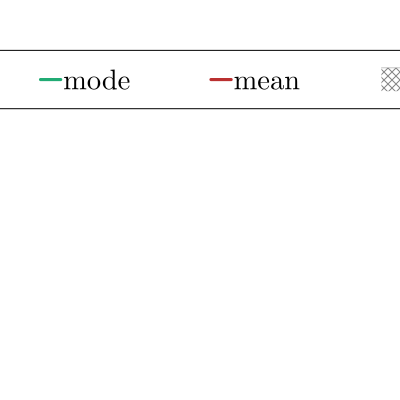

In [19]:
legendPlot = plot(
    [1 2 3], xlim = (4,5), legend = :top, framestyle = :none, label = ["median" "mode" "mean"], c = [3 4 5]);
plot!([1], [1],fillrange = 0, c= :grey,fillstyle =:x, lw = 0, label = "central 68%", legend_column =-1, size =(400,400), legendfontsize = 18, bottom_margin = -3mm)

In [20]:
layout = @layout [a{0.05h};
                  b c;
                  e f ;
                  g h]

4×1 Matrix{Any}:
 (label = :a, width = :auto, height = 0.05)
 Any[(label = :b, blank = false) (label = :c, blank = false)]
 Any[(label = :e, blank = false) (label = :f, blank = false)]
 Any[(label = :g, blank = false) (label = :h, blank = false)]

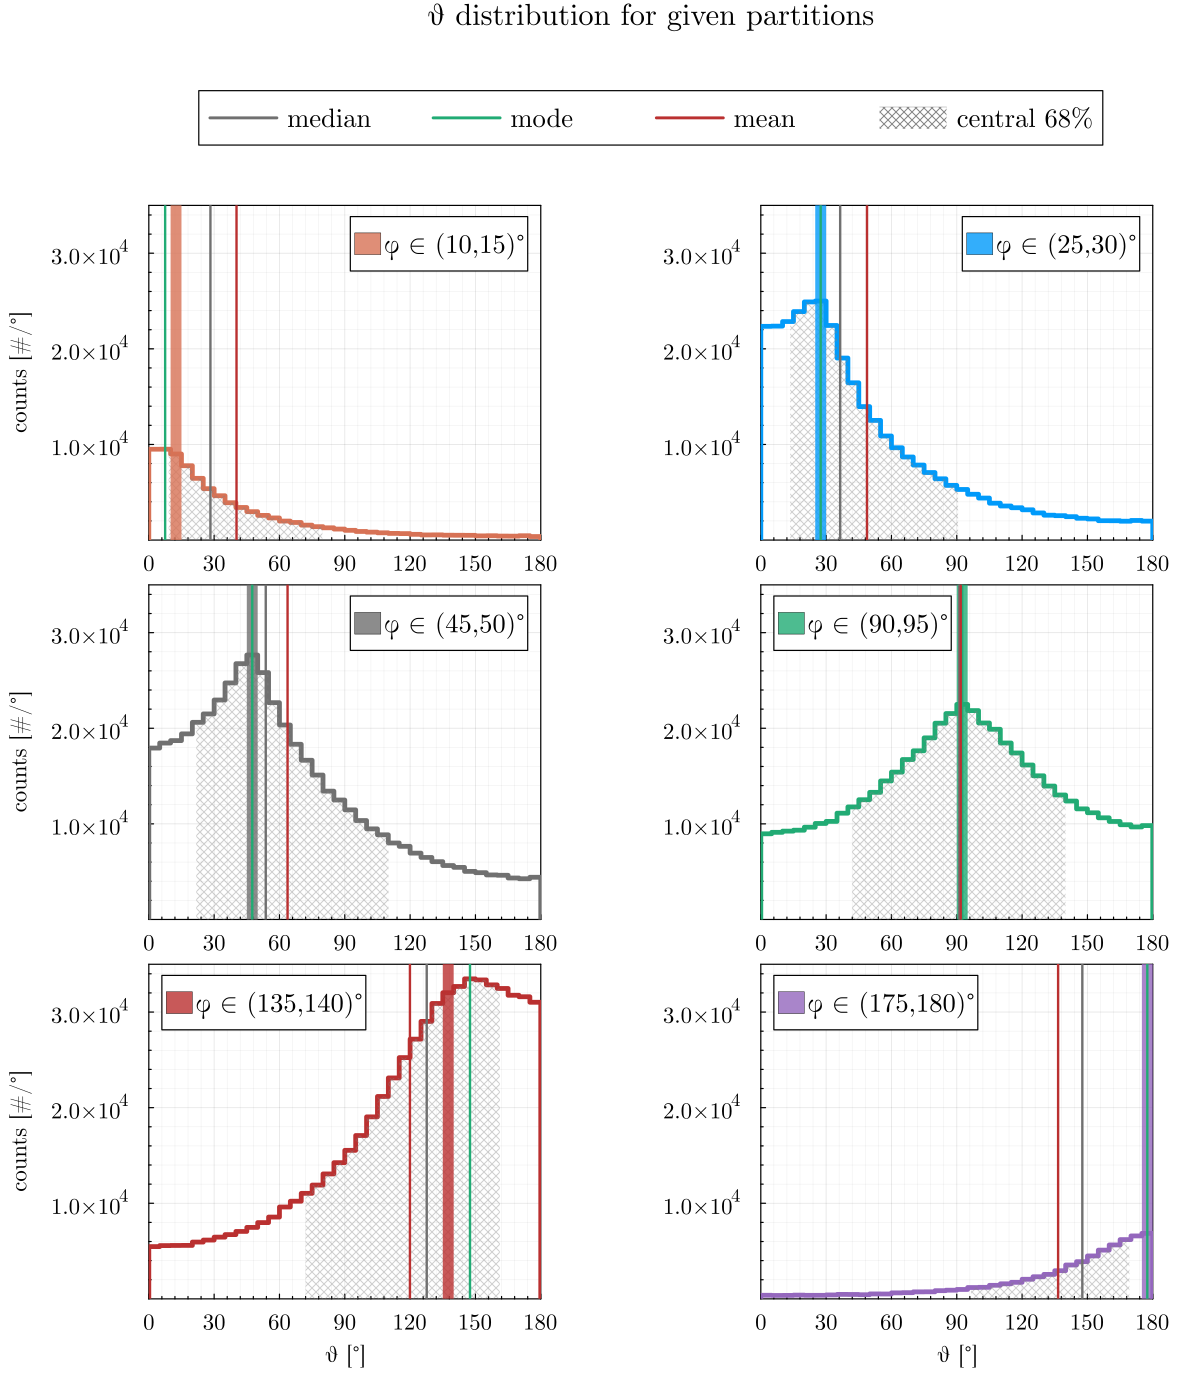

In [21]:
plot( legendPlot, hists[1], hists[2], hists[3], hists[4],  hists[5], hists[6], layout = layout, size =(1200, 1400),
        thickness_scaling = 1.2, guidefont=12, xtickfont=12, ytickfont=12, legendfont=14, gridalpha = 0.1, plot_title = "ϑ distribution for given partitions", top_margin = 2mm)

In [22]:
savefig("Figs/Slices_stats.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/Slices_stats.pdf"

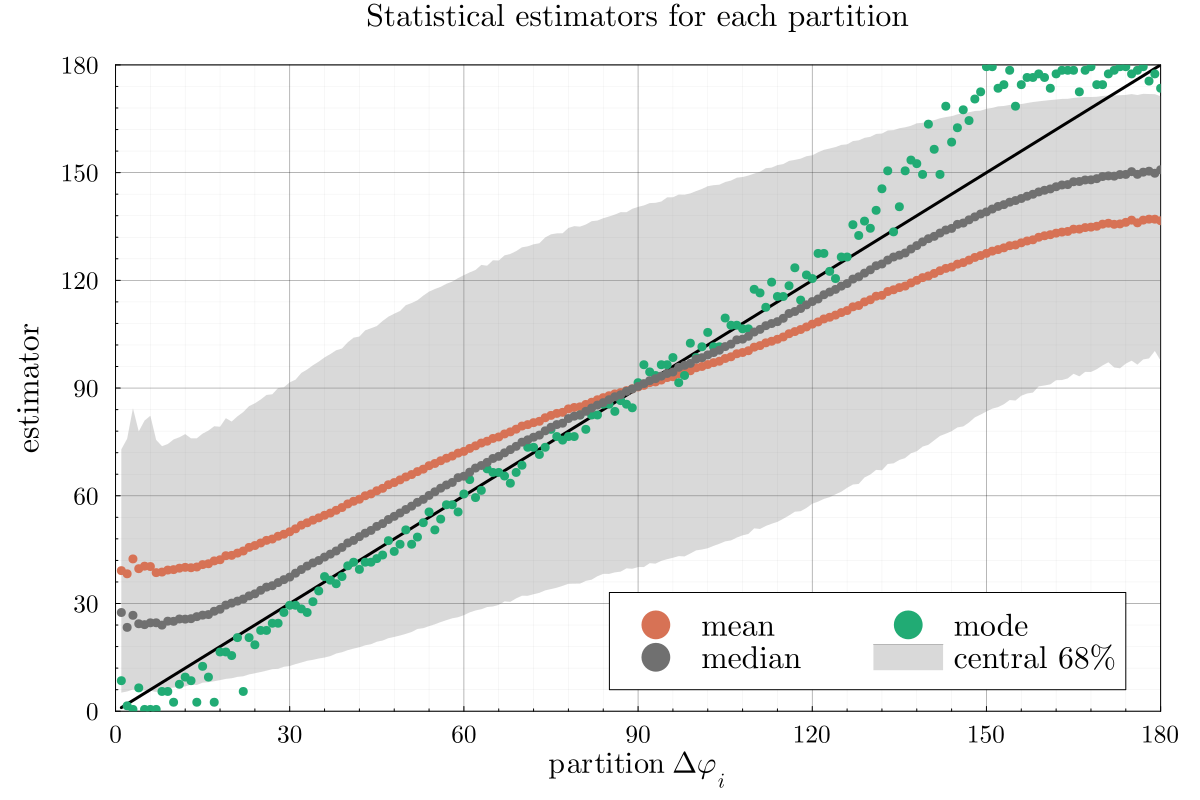

In [23]:
let dϕ = 1., len = Int(180/dϕ), means= fill(-1., len), 
    medians = fill(-1., len), modes = fill(-1., len), 
    lowers = fill(-1., len),uppers = fill(-1.,len)
    
    xrange = 1:dϕ:180
    lb, ub = (1 - 0.68)/2, (1 + 0.68)/2
    for (i, ϕ) in enumerate(1:dϕ:180)
        cutEdges1 = get_cut_edges(ϕ - 1, 1, dϕ, "p")                    # provides the lower and upper cut 
        sdf       = @chain tree begin                                   # filter out the dataframe
            @select(:thetaEscaped, :thetaEmitted, :weights)                       # keeps only the two angles columns
            @subset((cutEdges1[1] .<= :thetaEscaped .<= cutEdges1[2]))  # keeps only rows where ϕ is within the cut edges
        end

        stats = get_slice_stats(
                                cutEdges1[1],  # ϕmin
                                cutEdges1[2],  # ϕmax
                                0,             # Emin
                                3500,          # Emax
                                sdf.thetaEmitted, 
                                dϕ,
                                Weights(sdf.weights)
                                )

        means[i] = stats[5] 
        modes[i] = stats[6] - dϕ/2
        medians[i] =  quantile(sdf.thetaEmitted, 0.5) 
        lowers[i] = quantile(sdf.thetaEmitted, lb)
        uppers[i] = quantile(sdf.thetaEmitted, ub)
    end
    plot(xrange, uppers, fillrange=lowers, label = "", c = :grey, fa = 0.3, lw = 0)
    plot!(xrange, xrange, c =:black, lw =3, label = "")
    scatter!(xrange, means, label = "mean", c= 1, ms =5, lims = (0,180), ticks = 0:30:180, xlabel = L"\mathrm{partition}~\Delta\varphi_i", ylabel = "estimator")
    scatter!(xrange, modes, label = "mode", c=4, ms =5)
    scatter!(xrange, medians, label = "median", c=3, ms =5, title ="Statistical estimators for each partition" )
    plot!([1], [1],fillrange = 0, c=:grey, lw = 0, fa=0.3, label = "central 68%", legend_column =2, legend =:bottomright) 

end

In [24]:
savefig("Figs/Slices_stats_all.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/Slices_stats_all.pdf"

## k-lines

In the figure above of $f(\theta, \phi)$, a reference k = 0 line is shown by black dashed line. This line represents the bins where $\phi = \theta$, perfect correlation. In the figure below, two more k-lines are depicted. $k = -20$ and $k = +20$ lines are show in red and blue, respectively. These lines in turn represent $\phi - \theta = -20$ and $\phi - \theta = 20$. 

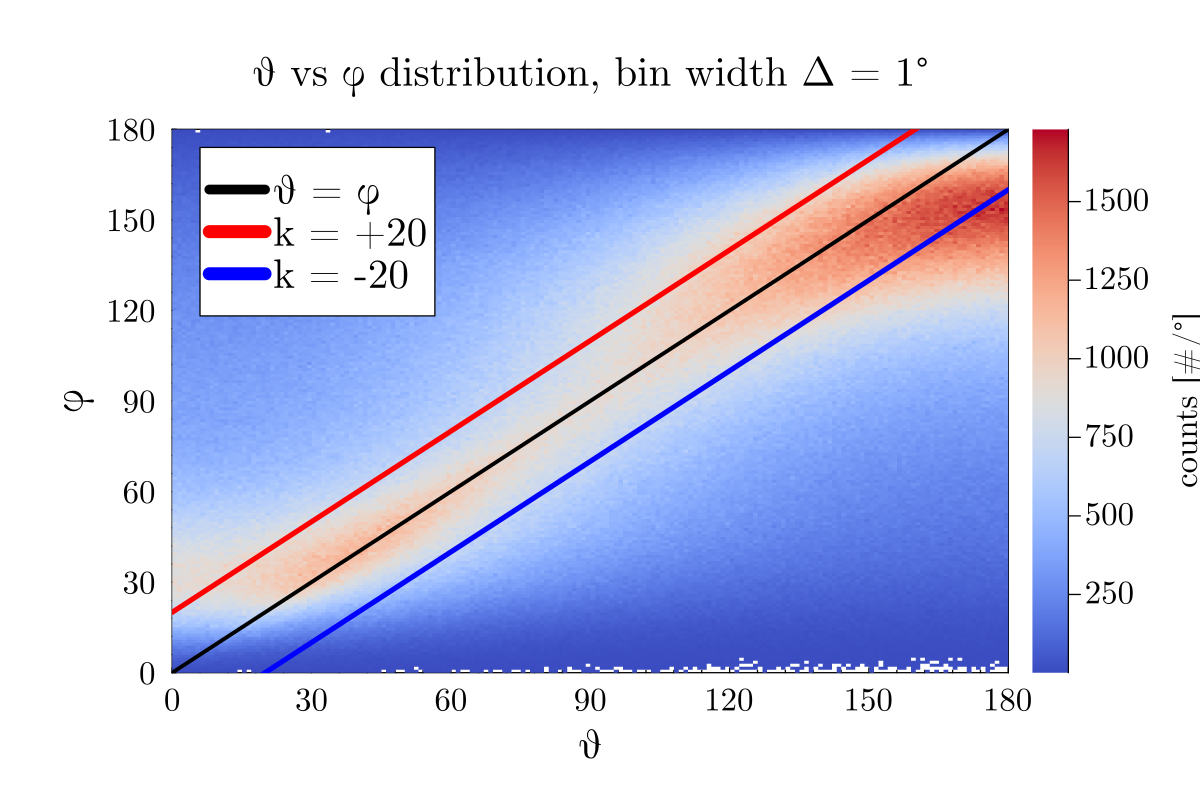

In [25]:
pts = 0:0.1:180

# plot!(h2d1, y, c = :black, lw= 3, ls =:dash, label = "k = 0", legend = :topleft)
plot!(h2d1, pts, pts .+ 20,  lw= 4, c  =:red , label = "k = +20")
plot!(h2d1, pts, pts .- 20,  lw= 4, c  =:blue, label = "k = -20")

In [26]:
savefig("Figs/Theta_vs_Phi_with_k_lines.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/Theta_vs_Phi_with_k_lines.pdf"

## $g(k)$

As stated earlier, the $g(k)$ is a 1D histgoram of the integrals over the k-lines. The total number of k-lines to integrate $f(\theta, \phi)$ over is equal to $(180/\Delta\phi) * 2 + 1$, dependent on the binwidth $\Delta\phi$. To avoid double binning, $g(k)$ is not calculated from $f(\theta, \phi)$ itself, but rather from the definition of $k$-lines. Thus for each event, $\phi - \theta$ is calculated and **then** binned in the 1D histogram $g(k)$. The figure below shows $g(k)$ of the original $f(\theta, \phi)$ presented above. In the text following, some data-cuts will be introduced which produce different $f_i(\theta, \phi)$ distributions and corresponding $g_i(k)$ histograms.  

#### To quantitatively describe the correlation using $g(k)$-method, we calculate the RMS of the distribution as the standard error and the area representing the total amount of events that pass the cuts. 

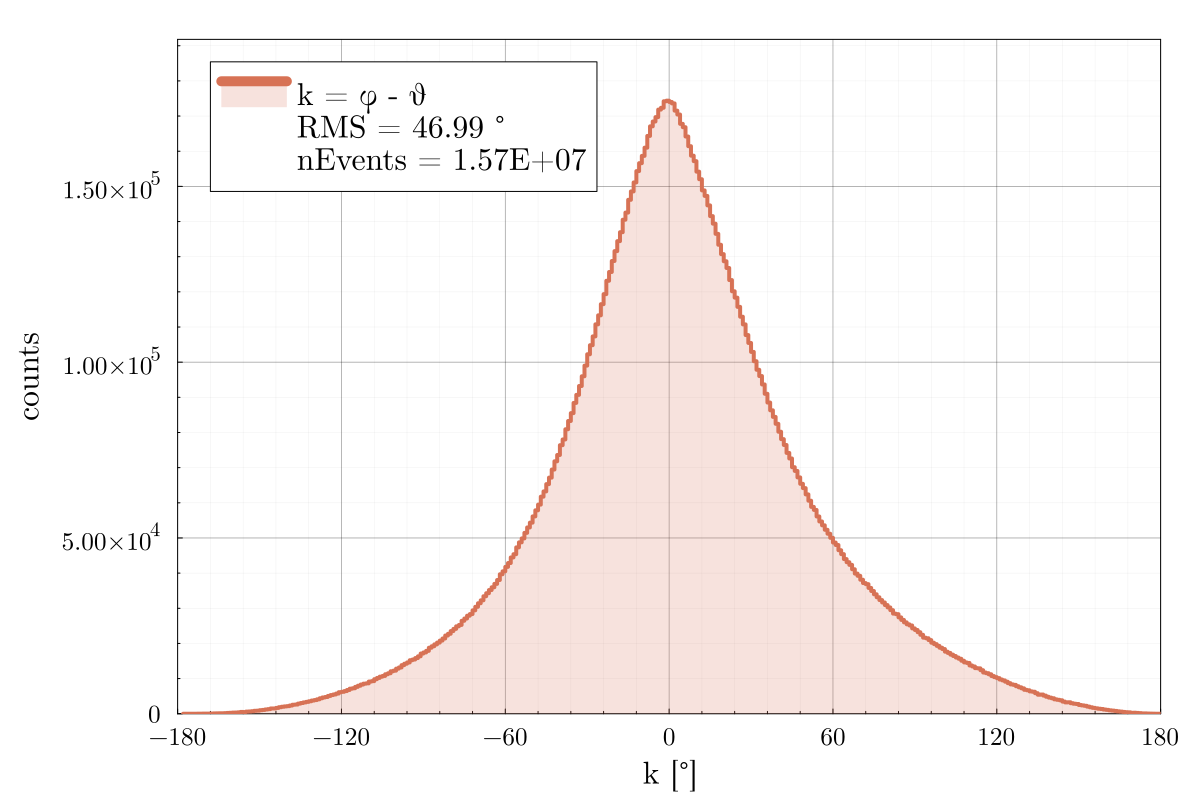

In [27]:
difs0 = tree.thetaEscaped .- tree.thetaEmitted    # array of ϕ - θ
rms0  = round(get_rms(difs0), digits = 2)
h0    = StatsBase.fit(Histogram, difs0, -180:1:180)
nEvents = @sprintf "%.2E" nrow(tree)

hk = histogram(difs0, 
    xlims  = (-180,180), 
    xticks = (-180:60:180),
    ylims  = (0, 1.1*maximum(h0.weights)), 
    nbins  = length(h0.edges[1]),
    xlabel = "k [°]",
    ylabel = "counts",
    label  = "k = φ - ϑ",
    lw     = 4,
    fillrange = 0,
    fillalpha = 0.2,
)

plot!(1, label = "RMS = $rms0 °", lw = 0, c =:white)
plot!(1, label = "nEvents = $nEvents", lw = 0, c =:white)


In [28]:
savefig("Figs/k_full_2Dist.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/k_full_2Dist.pdf"

The figure above depicts the $g(k)$ histogram calculated from $f(\theta, \phi)$. The $g(k)$ distribution is centered around $k = 0$ line, which represents perfect correlation. However, the distribution is quite wide as the $RMS = 46.99^{\circ}$. All events from the original distribution are represented. 

$g(k)$ - analysis of energy cuts
===

The goal of calculating $g(k)$ and its $RMS$ is to evaluate different data-cuts. In the analysis below, various energy cuts are tested. Six data-cuts are presented - the sum of electron energies $E_{sum}$ must fulfill $E_{sum} \in (500*i, 500*i + \Delta E); \Delta E = 500 keV; i = (1, 2, 3, 4, 5, 6) keV$. (Events with $E_{sum} \in (0, 500) keV$ are omitted as there is not enough statistics). 

First, a set of $f\_i(\theta, \phi)$ is presented.  

In [29]:
hs = []
for e in 500:500:3000
    e2 = e+500
    gdf = @chain tree begin
        @subset((e .<= :ESum .<= e2))
        @select(:thetaEscaped, :thetaEmitted, :ESum)
    end
    h= histogram2d(gdf.thetaEmitted, gdf.thetaEscaped, 
                 nbins = nBins, lims=(0, 180), xlabel="ϑ [°]", ylabel="φ [°]",
                 c = :coolwarm,  legend =:none, aspect_ratio=0.8,
                 ticks = (0:60:180), margin= 2mm
        )
    plot!(h, 1, label =L"E_{sum}\in (%$e, %$e2) \mathrm{keV}", lw = 0, c =:white, legend = :topleft)

    push!(hs,h)
end

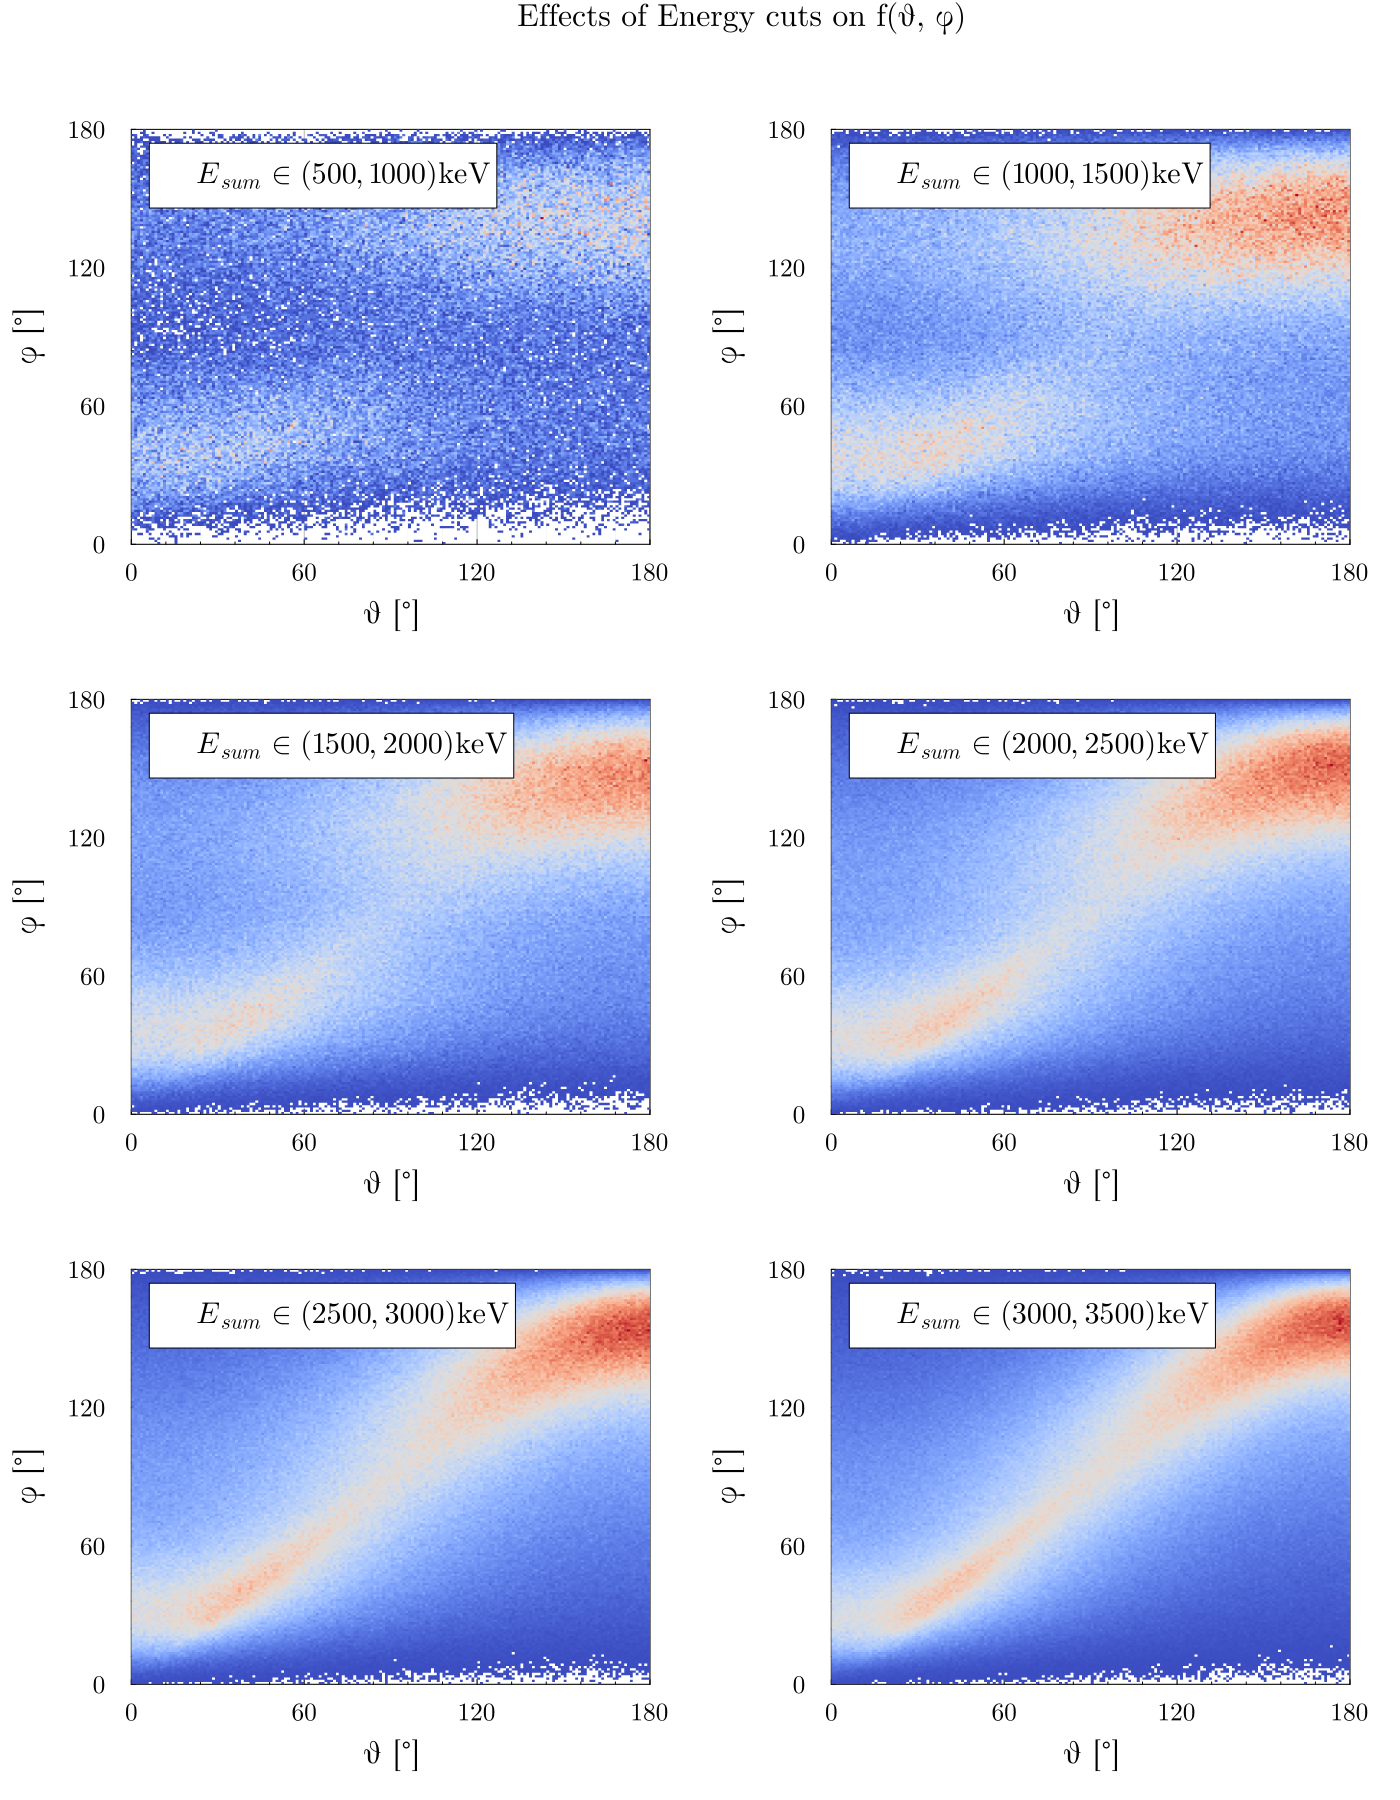

In [30]:
plot(hs[1], hs[2], hs[3], hs[4], hs[5], hs[6], size = (1400, 1800), plot_titlefontsize = 20,plot_title = "Effects of Energy cuts on f(ϑ, φ)", layout = @layout [a b; c d; e f ])

In [31]:
savefig("Figs/Ecuts.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/Ecuts.pdf"

Now the corresponding $g(k)$

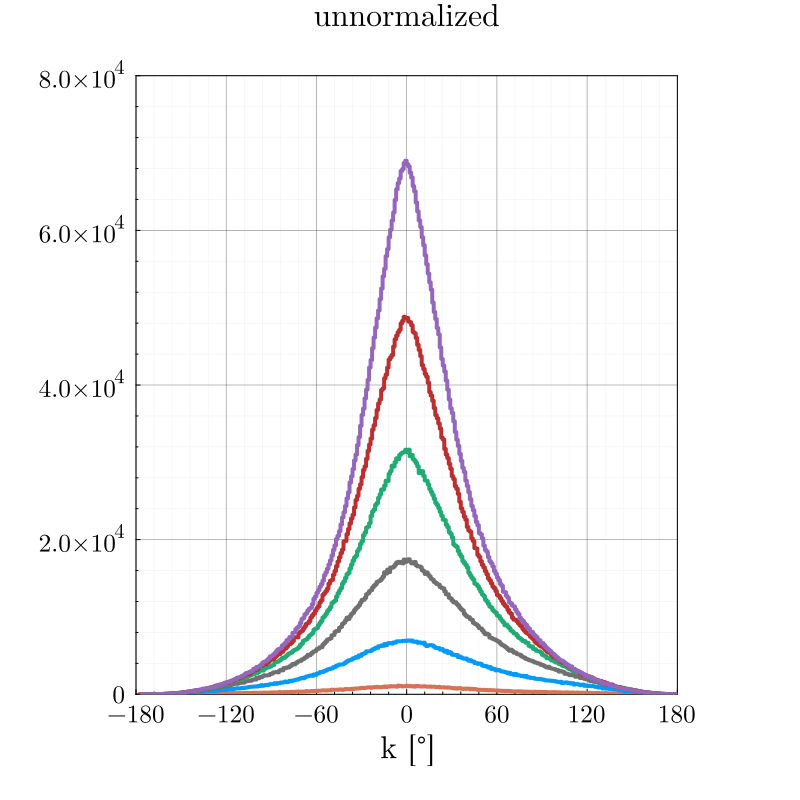

In [32]:
p1 = plot(size = (800, 800), legend=:topright, xlims=(-180, 180), xlabel="k [°]", title="unnormalized", lw = 4)
p3 = plot()
for (i,e) in enumerate(500:500:3000)
    e2 = e+500
    gdf = @chain tree begin
        @subset((e .<= :ESum .<= e2))
        @select(:thetaEscaped, :thetaEmitted, :ESum)
    end

    difs   = gdf.thetaEscaped .- gdf.thetaEmitted
    rms    = round(get_rms(difs), digits = 2)
    h1     = StatsBase.fit(Histogram, difs, -180:180)
    nEvents = @sprintf "%.2E" nrow(gdf)
    
    
    stephist!(p1, difs, 
        nbins  = Int(180/dϕ*2+1), 
        lw     = 4, 
        label  = "",#"\nE ∈ ($e, $e2)keV \nrms = $rms °\n",
        legend =:outertopright, 
        xlims  = (-180,180), 
        xlabel = "k [°]",
        xticks = -180:60:180,
        ylims  = (0, 8e4),
    )
    plot!(p3,1, label = "\nE ∈ ($e, $e2)keV \nrms = $rms °\nevents = $nEvents",legend_column =3, legendfontsize = 14, framestyle =:none, legend =:topright)
    
end
# plot!(p, 1, legend_column =3, label ="", size = (1200, 1000), legendfontsize = 14)
p1

It is visible from both figures $f_i(\theta, \phi)$ that the number of events increases with increasing energy. 

The $RMS$ is represented in the legend. Again, with increasing energy data-cut $RMS$ decreases. To view the width of each distribution, the histograms are normalized to area of 1.

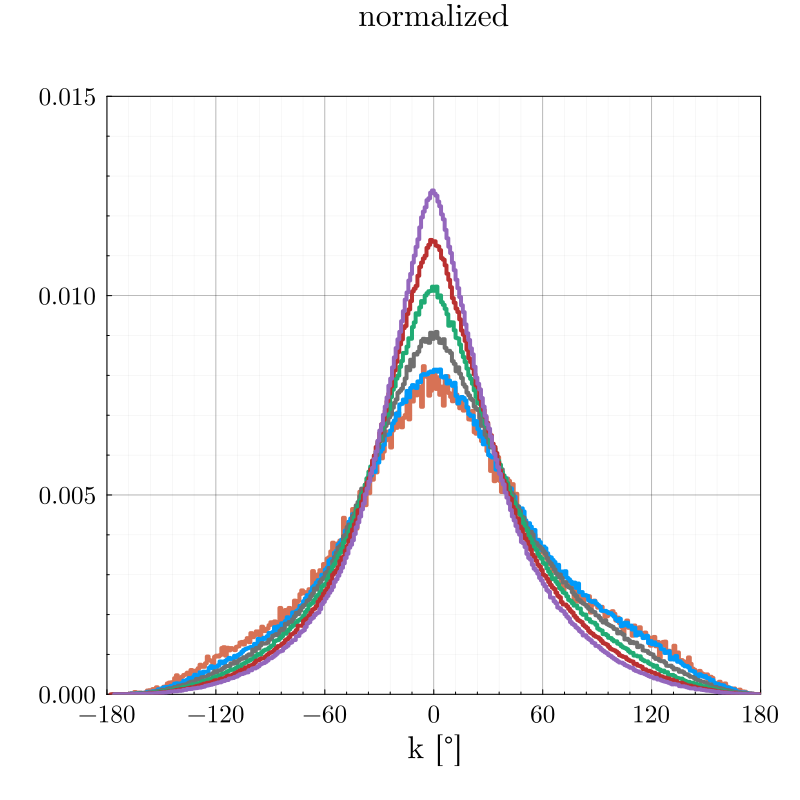

In [33]:
p2 = plot(size = (800, 800), legend=:topright, xlims=(-180, 180), xlabel="k [°]", title="normalized", lw = 4)
for (i,e) in enumerate(500:500:3000)
    e2 = e+500
    gdf = @chain tree begin
        @subset((e .<= :ESum .<= e2))
        @select(:thetaEscaped, :thetaEmitted, :ESum)
    end

    difs   = gdf.thetaEscaped .- gdf.thetaEmitted
    rms    = round(get_rms(difs), digits = 2)
    h1     = StatsBase.fit(Histogram, difs, -180:180)
    
    stephist!(
            p2, difs, 
            nbins  = Int(180/dϕ*2+1), 
            lw     = 4, 
            label  = "", #"\nE ∈ ($e, $e2)keV \nrms = $rms °\n",
            legend =:outertop, 
            xlims  = (-180,180), 
            xticks = -180:60:180,
            xlabel = "k [°]",
            ylims  = (0, 0.015),
            norm =:pdf
    )

end
# plot!(p2, 1, legend_column =3, label ="", size = (1200, 1000), legendfontsize = 14)
p2

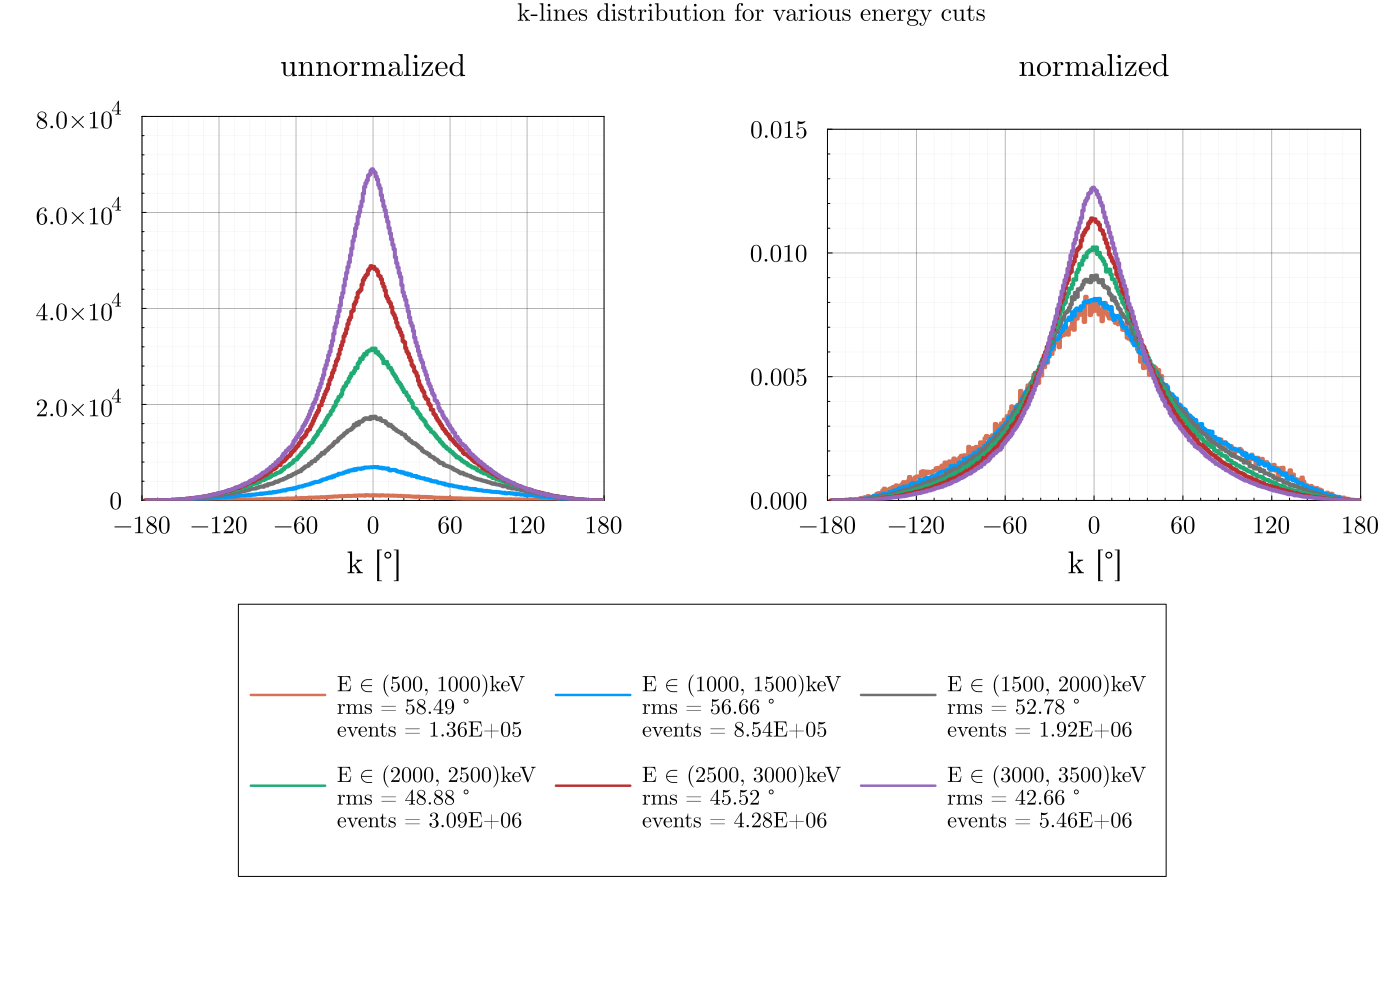

In [34]:
plot( p1, p2, p3, size = (1400, 1000), bottom_margin = -4mm,plot_title = "k-lines distribution for various energy cuts",layout =@layout [b c;_{0.9w} a{0.1h} _] )

In [35]:
savefig("Figs/klines_Ecuts.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/klines_Ecuts.pdf"

### From the figure, it is visible that increasing the energy cut improves the corellation. The $g(k)$-method can be used for quantification of correlation.

Slicing horizontally 
===

We can see that while applying an energy cut on the data results in decreased statistics, it did provide for a better reconstruction precision. We thus have a tool for comparing the effects of data cuts on the data.

Next we look more in detail at individual $\Delta\phi$ slices. We will slice up $f(\theta,\phi)$ horizontally in slices of $\Delta\phi$ = $1^{\circ}$. However, for better visualisation of what is happening we first show a horizontal slice with $\phi \in (10, 15)\deg$ and its $g(k)$ as:

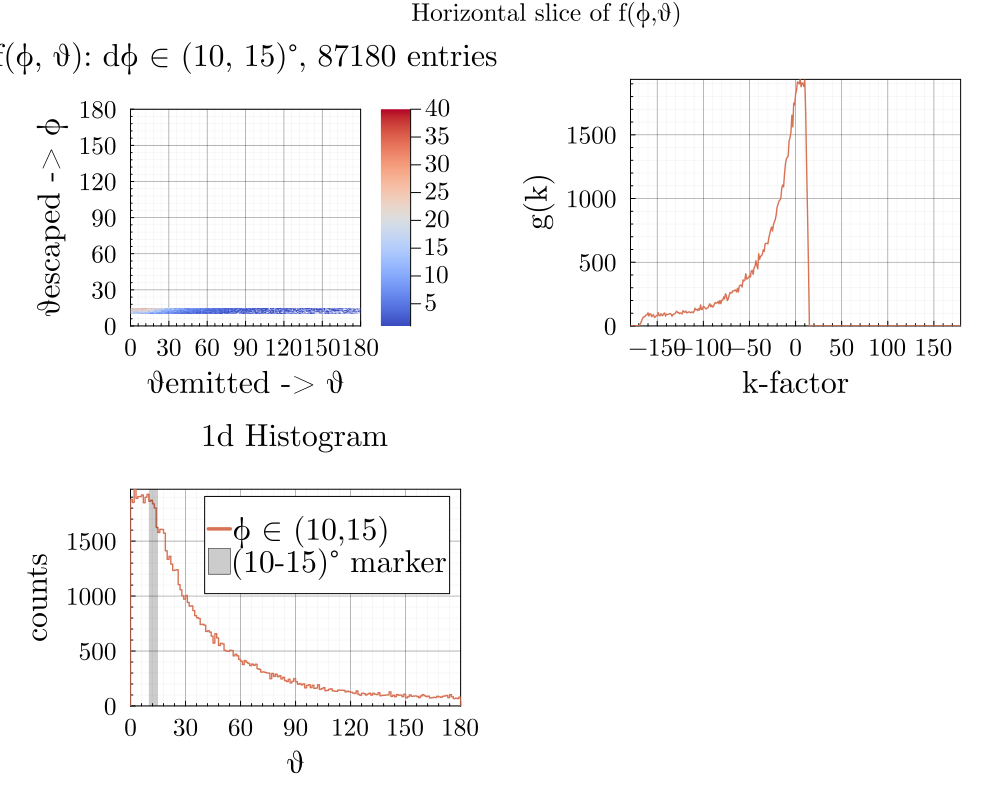

In [36]:
gdf = @chain tree begin
    @subset((10 .<= :thetaEscaped .<= 15))
    @select(:thetaEscaped, :thetaEmitted, :weights)
end

fh2d = Hist2D(                                          
(gdf[!,2], gdf[!,1]),
    Weights(gdf.weights),
(minAngle:dEmitted:maxAngle, minAngle:dEmitted:maxAngle), 
) 

gs4 = get_diagonal_sums(fh2d)
ks4 = get_k_factors(fh2d);

h = histogram2d(gdf[!,2], gdf[!,1];
    nbins        = (nBins, nBins),
    weights      = gdf.weights,
    xlabel       = "θemitted -> θ",
    ylabel       = "θescaped -> ϕ",
    legend       = :topright,
    title        = string("f(ϕ, θ): dϕ ∈ (10, 15)°, ", nrow(gdf), " entries"),
    lims         = (0, 180),
    c = :coolwarm
    # aspect_ratio = 1,
    )
h1d = stephist(gdf.thetaEmitted, nbins = nBins, weights = gdf.weights, 
                label ="ϕ ∈ (10,15)",xlabel ="θ", ylabel ="counts",
                title = "1d Histogram", legend =:topright)
vspan!([10,15], label ="(10-15)° marker", c =:black, alpha= 0.2)
p = plot(ks4, gs4, label = "", xlabel = "k-factor", ylabel ="g(k)")

l = @layout [a{0.5w} b; c{0.5w} _]
plot(h,p,h1d, layout = l, plot_title = "Horizontal slice of f(ϕ,θ)", size = (1000,800))

This procedure is repeated for each slice with $\Delta\phi = 1^{\circ}$. Slicing $f(\phi, \theta)$ horizontally to cover the whole 0 - 180 degree range yields $g(k)$s:

In [37]:
p = plot(size = (800, 800), legend=:none, xlims=(-180, 180), xlabel="k [°]", ylabel="g(k) [#/°]", lw = 4, dpi =3)
for (i,p) in enumerate(0:dϕ:180)
    p2 = p+dϕ
    gdf = @chain tree begin
        @subset((p .<= :thetaEscaped .<= p2))
        @select(:thetaEscaped, :thetaEmitted)
    end

    difs   = gdf.thetaEscaped .- gdf.thetaEmitted
    rms    = round(get_rms(difs), digits = 2)
    h1     = StatsBase.fit(Histogram, difs, -180:180)
    
    stephist!(p, difs, 
        nbins  = Int(180/dϕ*2+1), 
        lw     = 4, 
        label  ="",
        legend =:topright, 
        xlims  = (-180,180), 
        xlabel = "k [°]",
        ylims  = (0, 1e3)
    )

end
p;

Not much can be deduced in this example. So many lines are difficult to decipher. However, if one were to look at the individual $\Delta\phi$ cuts as a new dimension, we can look at the graph in the plane of $(k, \Delta\phi)$ with z-direction being the value of $g(k, \Delta\phi)$. 

In [38]:
dfGOrig = get_gs_df(tree, dϕ, sign)
matGOrig = df_to_mat(dfGOrig);

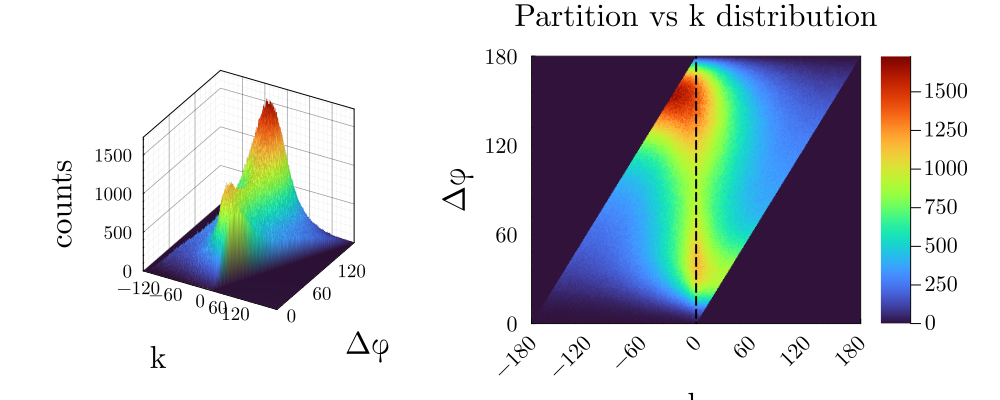

In [39]:
xRange = dϕ-180:dϕ:180-dϕ
yRange = 0:dϕ:180-dϕ
sf1 = surface(xRange, yRange,  matGOrig, legend =:none, xlabel ="k", ylabel ="Δφ", zlabel="counts", tickfontsize = 12, c= :turbo, yticks = (0:60:180), xticks = (-180:60:180))
hm1 = heatmap(xRange, yRange .+ dϕ/2,  matGOrig, ylabel ="Δφ", xlabel ="k" , tickfontsize = 14, bottom_margin  = 6Plots.mm, c= :turbo, yticks = (0:60:180), xticks = (-180:60:180), ylims = (0,180), xlims = (-180,180), title = "Partition vs k distribution", xrotation = 45)
vline!([0], label ="", c = :black, lw = 2, s=:dash)
plot(sf1,hm1, size =(1000,400), layout = @layout [a{0.4w} b])

In [40]:
savefig("Figs/3D_klines.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/3D_klines.pdf"

Now we can see a few important features. First of all, there are two peaks visible in the left figure, with the higher peak (more statistics) being in the region of $130^{\circ} < \phi < 17^{\circ}0$ . Secondly,  we can see the deviation of the peaks from the `` k = 0`` line in the right figure. There are two hotspots visible. First hotspot (corresponding to the lower peak in  figure) is centered around $\Delta\phi \approx 30^{\circ}$ and is shifted slightly to the right of the ``k = 0`` line. The escaped angle overestimates the emitted angle. Second hotspot (corresponding to the higher peak in figure) is centered around $\Delta\phi \approx 150^{\circ}$ and is shifted visibly to the left of the ``k = 0`` line. The escaped angle underestimates the emitted angle. Lastly, we can see that the regions $\phi \approx 0^{\circ}$ and $\phi \approx 180^{\circ}$ are squeezed toward higher, lower angles, respectively. 

Furthermore, we can also look at how the individual $\Delta\phi$ slices look in terms of statistical variables (mean, mode, median). For each variable, obtained from the $\phi(\theta)$ distributions. 

In [41]:
means   = Vector{Float64}(undef, Int(180/dϕ))
modes   = Vector{Float64}(undef, Int(180/dϕ))
medians = Vector{Float64}(undef, Int(180/dϕ))

for (i, ϕ) in enumerate(1:dϕ:180)
    cutEdges1 = get_cut_edges(ϕ - 1, 1, dϕ, "p")                    # provides the lower and upper cut 
    sdf       = @chain tree begin                                   # filter out the dataframe
        @select(:thetaEscaped, :thetaEmitted, :weights)                       # keeps only the two angles columns
        @subset((cutEdges1[1] .<= :thetaEscaped .<= cutEdges1[2]))  # keeps only rows where ϕ is within the cut edges
    end
    
    stats = get_slice_stats(
                            cutEdges1[1],  # ϕmin
                            cutEdges1[2],  # ϕmax
                            0,             # Emin
                            3500,          # Emax
                            sdf.thetaEmitted, 
                            dϕ,
                            Weights(sdf.weights)
                            )
    
    means[i] = stats[5] 
    modes[i] = stats[6] .+ dϕ/2
    medians[i] =  stats[7] 
end

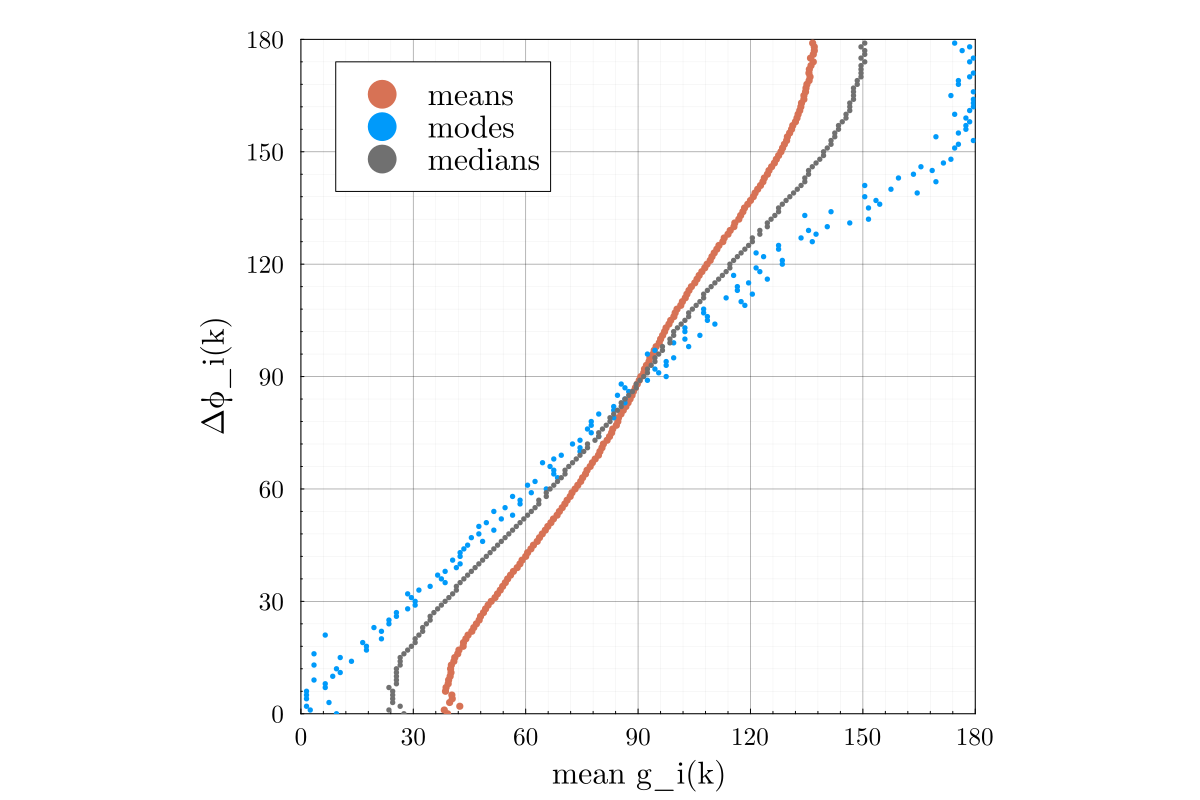

In [42]:
scatter( means, xPts, ms = 4, label = "means" , xlabel = "mean g_i(k)", ylabel ="Δϕ_i(k)", aspect_ratio =1, legend = :topleft, lims = (0,180))
scatter!( modes, xPts, ms = 3, label ="modes" )
scatter!( medians, xPts, ms = 3, label ="medians" )

Shift to reduce RMS
===


The goal of the analysis which is presented in the pages below is to alter the $\phi$ data so that the overall RMS is reduced - in other words, we want to find such representation of $\phi$ which leads to least error. 

First, we define (or describe) three variables:
1. $\phi$ - the escape angle is an experimentally measurable variable,
2. $\theta$ - the decay angle is inaccesible through experiment,
3. $\phi'$ - a new angle which we define as the *representation* of measured $\phi$ (we **want** $\phi' \approx \theta$).

Since $\theta$ is no accessible, we have introduced a new variable $\phi'$ which is supposed to represent the **most likely $\theta$ which the measured $\phi$ originated from**. We could see in the individual slice histograms that each event in $\Delta\phi$ slice can have originated from any $\theta$, with varying probabilites. We want $\phi'$ to represent the most likely $\theta$. 

To obtain $\phi'(\phi)$ we define it as:
$\phi'(\phi) = \phi + s$
Where $s$ is a constant *shift* which minimizes RMS for each $\phi$ obtained from $\Delta\phi$ slices. 

Here we introduce three various possibilities for what $s$ could be. The most obvious shift to use would be to take advantage of statistical estimators presented earlier. We present *shift* for each $\phi \in \Delta\phi$ so that when we apply the shift, the given statistical estimator will lie within the $\Delta\phi$ slice. 

For example, for mean, to obtain $s$ we use:
$s = \bar{\theta} - \Delta\phi_{center}$. Where $\bar{\theta}$ is the mean of the $\theta$ distribution of the given $\Delta\phi$ slice and $\Delta\phi_{center}$ is the bincenter of the slice. Analogous for mode and median.

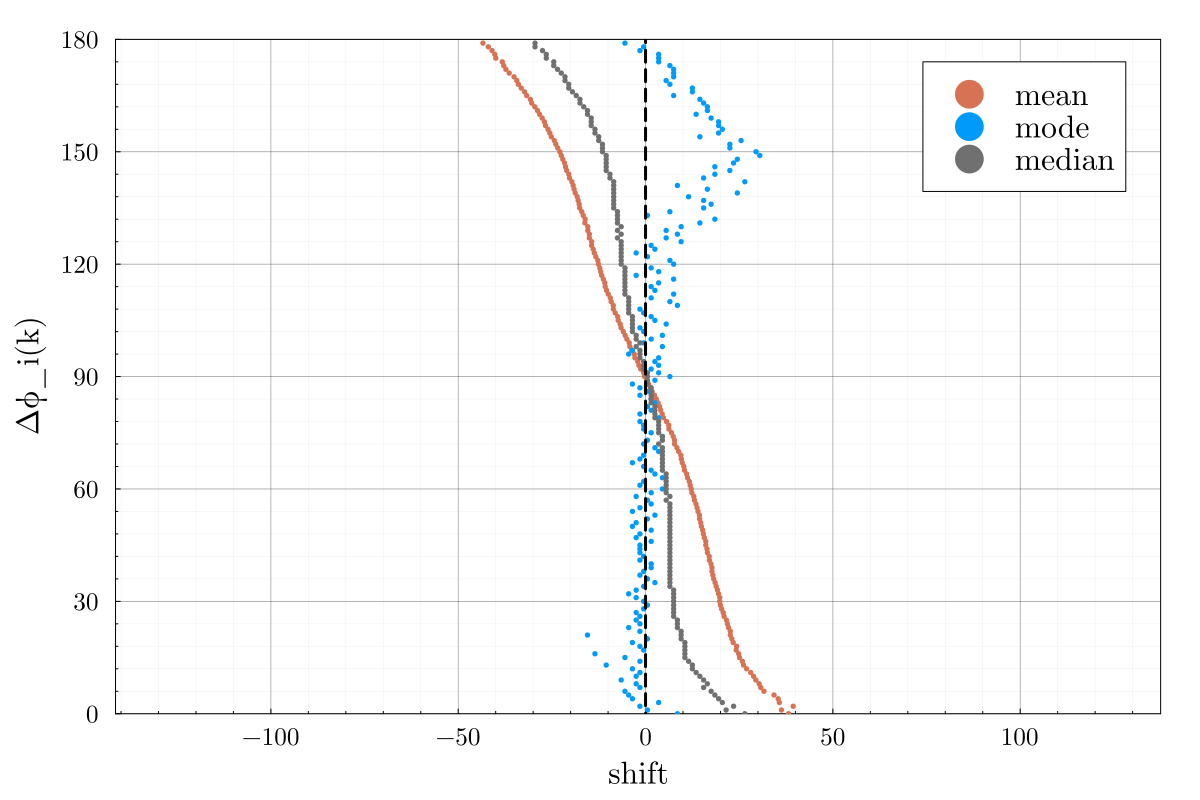

In [43]:
res_means = [ means[i] - y(i*dϕ) for i in 1:length(means) ]
res_modes = [ modes[i] - y(i*dϕ) for i in 1:length(modes) ]
res_medians = [ medians[i] - y(i*dϕ) for i in 1:length(medians) ]

scatter( res_means, xPts, ms = 3, label = "mean" , xlabel = "shift", ylabel ="Δϕ_i(k)", ylims = (0,180), aspect_ratio =1, legend = :topright)
scatter!( res_modes, xPts, ms = 3, label ="mode" )
scatter!( res_medians, xPts, ms = 3, label ="median" )
vline!([0], label ="", c = :black, lw = 3, s=:dash)

We can see that for each $\Delta\phi_i$ slice the three estimators provide different values to shift the angles by. The most drastic shift (ie. farthest away from ``k=0``) is given by mean, the least on the other hand by mode. 

To avoid undesirable discretization of our data, we fit the shifts. We also flipped the axes so that we get $s(\Delta\phi_i)$.

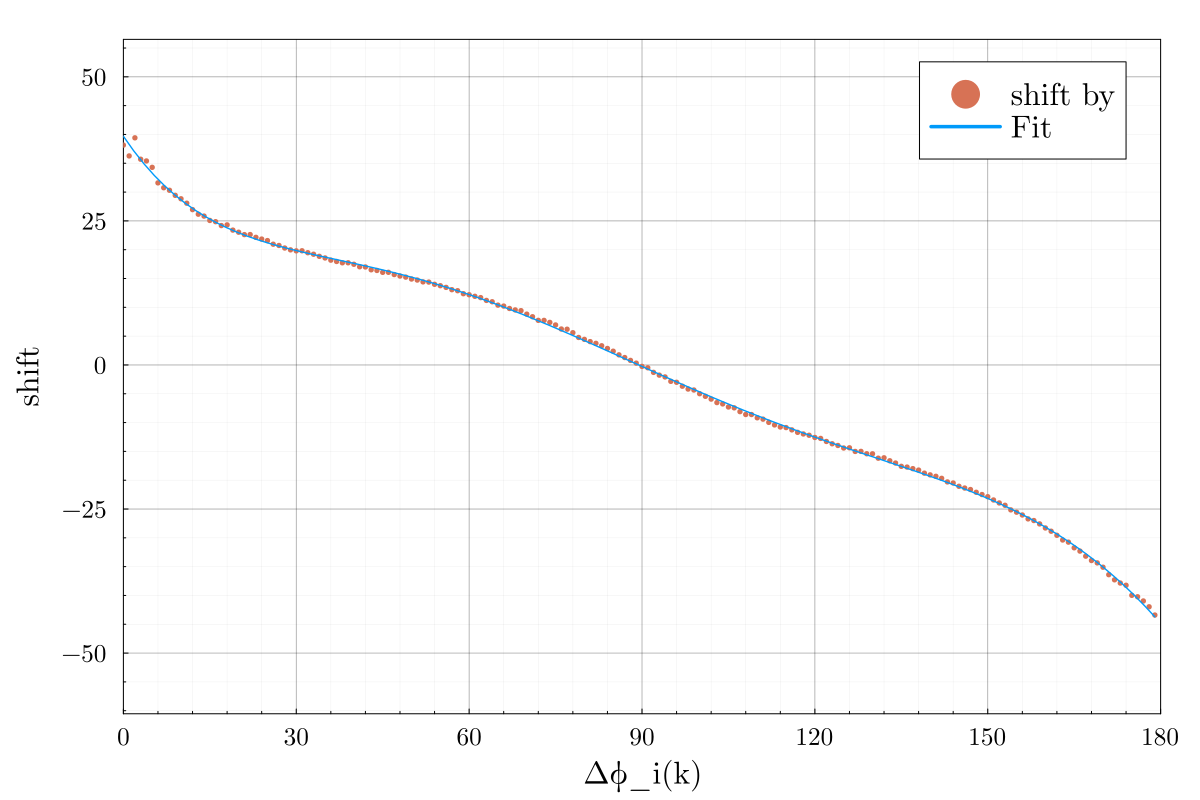

In [107]:
scatter(  xPts,res_means, ms = 3, label = "shift by" , ylabel = "shift", xlabel ="Δϕ_i(k)", xlims = (0,180), aspect_ratio =1, legend = :topright)
f2 = Polynomials.fit(xPts,  res_means, 6 )

plot!(f1, extrema(xPts)..., label="Fit")


Now we shift each $\phi$ in the original data set to obtain a new set of $\phi'$, we do so by $\phi' = \phi +s$. 

*Shift by mean*
====

In [108]:
modTree2 = @chain tree begin
    @select(:thetaEmitted, :thetaEscaped, :weights)
    @rtransform :bin =  get_bin_center(:thetaEscaped, Int(180/dϕ))  # create a vector of bin centers (which bin ϕ falls inside)
    @transform :thetaEscapedOld = :thetaEscaped                     # create a copy of the old ϕ (for comparison only)

    @rtransform :thetaEscapedDisc = :thetaEscapedOld + res_means[Int(ceil(:bin/dϕ))] # shift ϕ by s: ϕ' = ϕ + s 
    @rtransform :thetaEscaped = :thetaEscapedOld + f2(:thetaEscapedOld) # shift ϕ by s: ϕ' = ϕ + s 
    @subset( 0 .< :thetaEscaped .< 180) # keep only physical angles
end

15747968×6 DataFrame
      Row │ thetaEmitted  thetaEscaped  weights  bin      thetaEscapedOld  thetaEscapedDisc 
          │ Float64       Float64       Int64    Float64  Float64          Float64          
──────────┼─────────────────────────────────────────────────────────────────────────────────
        1 │     89.6031        92.2988        1     94.5          94.6325           92.5524
        2 │     96.965        120.357         1    139.5         139.497           120.722
        3 │    154.233        119.633         1    138.5         138.388           120.144
        4 │     67.3403       129.17          1    154.5         154.281           129.132
        5 │     11.2133        67.4548        1     53.5          53.0724           67.4527
        6 │    168.417         84.8354        1     81.5          81.0901           85.1413
    ⋮     │      ⋮             ⋮           ⋮        ⋮            ⋮                ⋮
 15747964 │     96.6308        75.1089        1     64.5          64.4923           75.4601
 15747965 │     92.3844        84.2639        1     80.5          80.0625           84.5025
 15747966 │     62.3112       105.072         1    116.5         116.241           104.974
 15747967 │     54.0483        68.2291        1     54.5          54.1664           68.1629
 15747968 │    156.655        103.813         1    114.5         114.239           103.473
                                                                       15747957 rows omitted

In [46]:
dfG2 = get_gs_df(modTree2, dϕ, sign)
matG2 = df_to_mat(dfG2);

We look at the $f(\theta, \phi')$ figure.

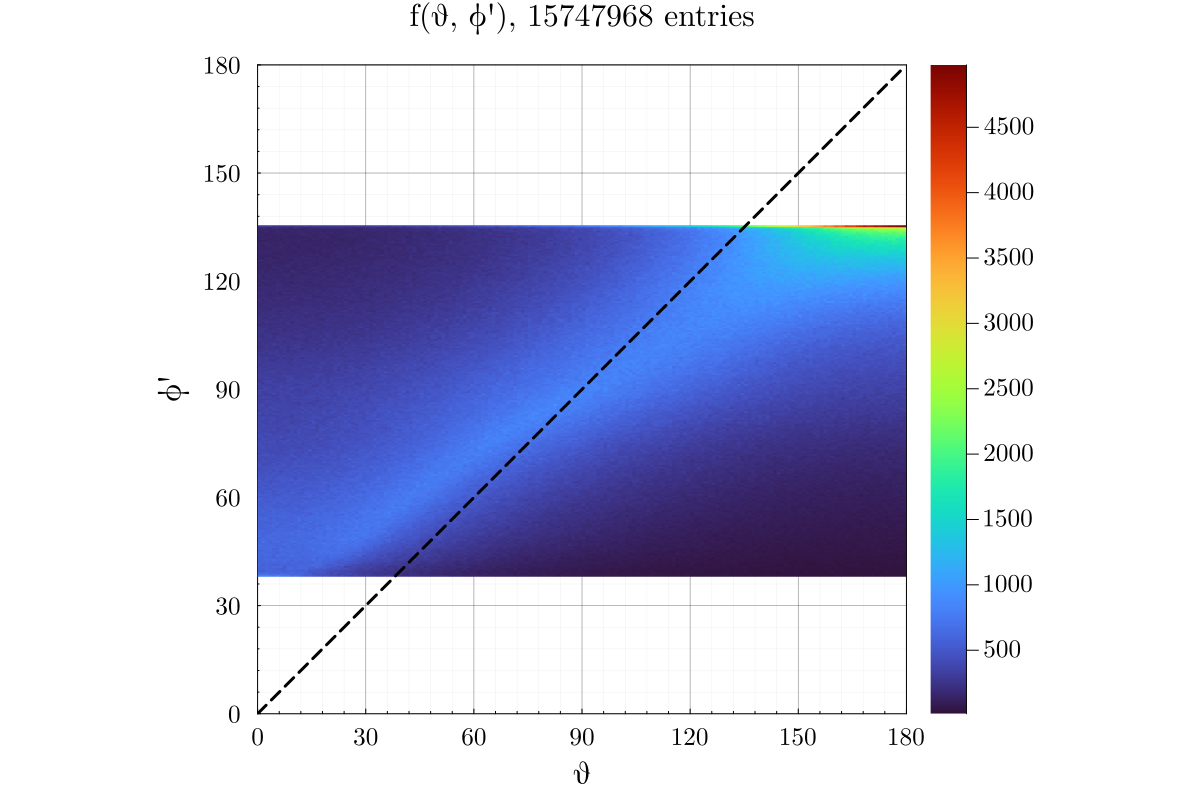

In [47]:
h2d2 = histogram2d(modTree2.thetaEmitted, modTree2.thetaEscaped,
    nbins        = (nBins, nBins),
    weights      = modTree2.weights,
    xlabel       = "θ",
    ylabel       = "ϕ'",
    legend       = :topright,
    title        = string("f(θ, ϕ'), ", nrow(modTree2), " entries"),
    lims         = (0, 180),
    aspect_ratio = 1,
    right_margin = 6Plots.mm,
    c= :turbo
)
plot!(xPts, xPts, label ="", c= :black, style= :dash, lw =3)

We can see that shifting by mean value resulted in *squeezing* the phase-space. We have reduced the range of angles which we can interpret in our measuremt. However, this should lead toward reduces RMS. We look at that in the following figures.

First, for comparison the original dataset with $f(\theta, \phi)$, $g(k, \Delta\phi)$, calculated $RMS$ for each $g_i(k)$ and total $RMS$.  

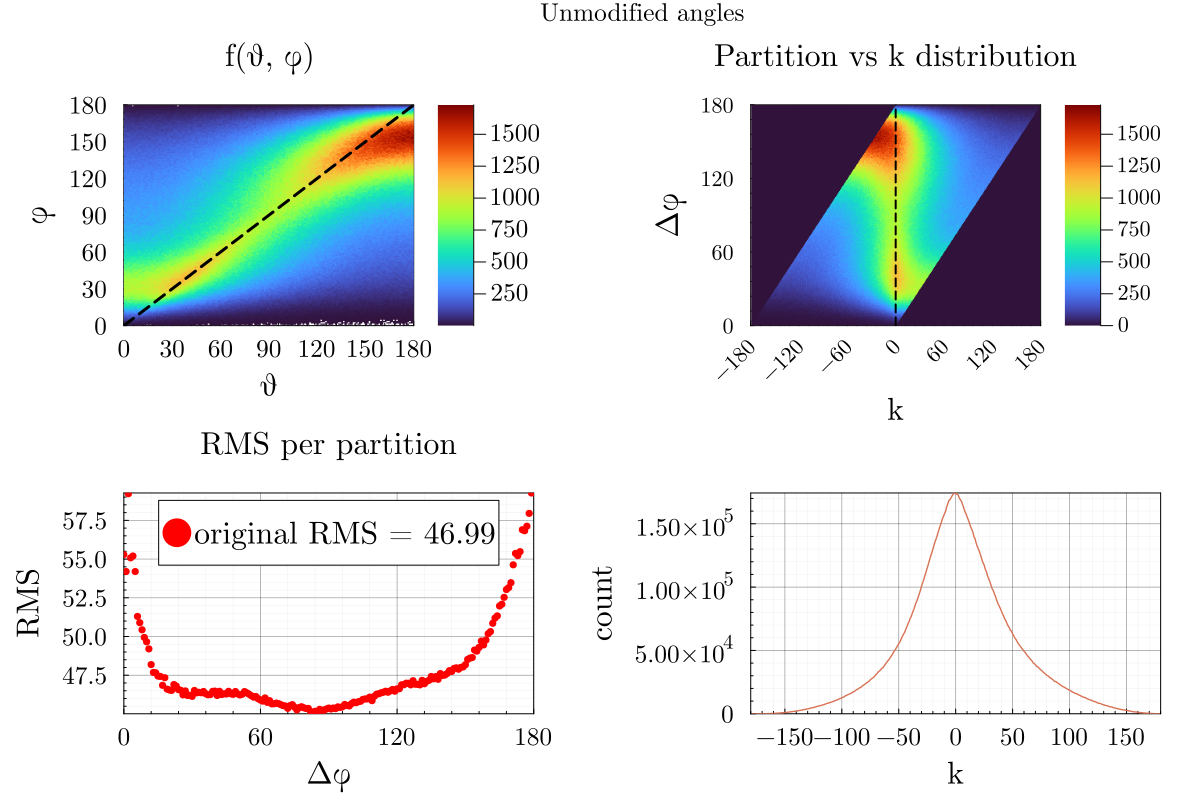

In [48]:
h2d1 = histogram2d(
    tree.thetaEmitted,
    tree.thetaEscaped;
    nbins        = (nBins, nBins),
    weights      = tree.weights,
    xlabel       = "θ",
    ylabel       = "φ",
    legend       = :topright,
    title        = string("f(θ, φ)"),
    lims         = (0, 180),
#     aspect_ratio = 1,
    c = :turbo,
)

fh2d1 = Hist2D((tree.thetaEmitted, tree.thetaEscaped),
    Weights(tree.weights),
    (minAngle:dEmitted:maxAngle, minAngle:dEmitted:maxAngle))
gs1 = get_diagonal_sums(fh2d1)
ks1 = get_k_factors(fh2d1);


plot!(xPts, xPts, label ="", c= :black, style= :dash, lw =3)
rms1 = [ get_rms(dfGOrig[:,i], dfGOrig[:,1]) for i in 2:ncol(dfGOrig) ]
rmsTotalUnModded = round(get_rms(gs1, ks1 .* dEmitted ), digits = 2)

sct1 = scatter( xPts, rms1, ms=4, legend=:top, xlabel ="Δφ", ylabel ="RMS", c= :red, label ="original RMS = $rmsTotalUnModded", title = "RMS per partition", xlims = (0,180), xticks = 0:60:180 )

fh2d1 = Hist2D((tree.thetaEmitted,tree.thetaEscaped), 
    Weights(tree.weights),
    (minAngle:dEmitted:maxAngle, minAngle:dEmitted:maxAngle))
gs1 = get_diagonal_sums(fh2d1)
ks1 = get_k_factors(fh2d1);

gk1 = plot(ks1 .* dEmitted, gs1, legend=:topright, xlims=(-180, 180), xlabel="k", ylabel="count", label="")

# plot(title, h2d1, hm1, sct1, layout = @layout[a{0.05h};b c; d _] , size = (1100, 800))
plot(h2d1, hm1, sct1, gk1, layout = @layout[a b; c d] , size = (1200, 800), plot_title= "Unmodified angles")

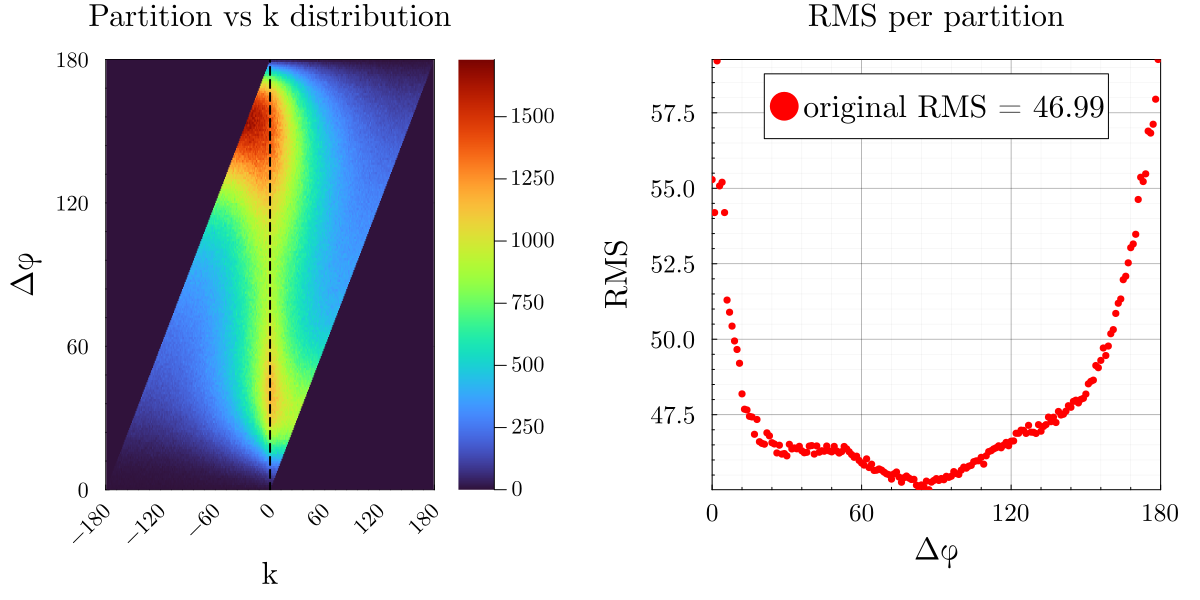

In [49]:
column_unmodded = plot(hm1, sct1, layout = grid(1,2), size = (1200, 600), bottom_margin = 12mm)

In [50]:
savefig("Figs/2D_klines_and_RMS_unmodded.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/2D_klines_and_RMS_unmodded.pdf"

In [51]:
savefig(sct1, "Figs/RMS_unmodded.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/RMS_unmodded.pdf"

And the **modified** dataset.

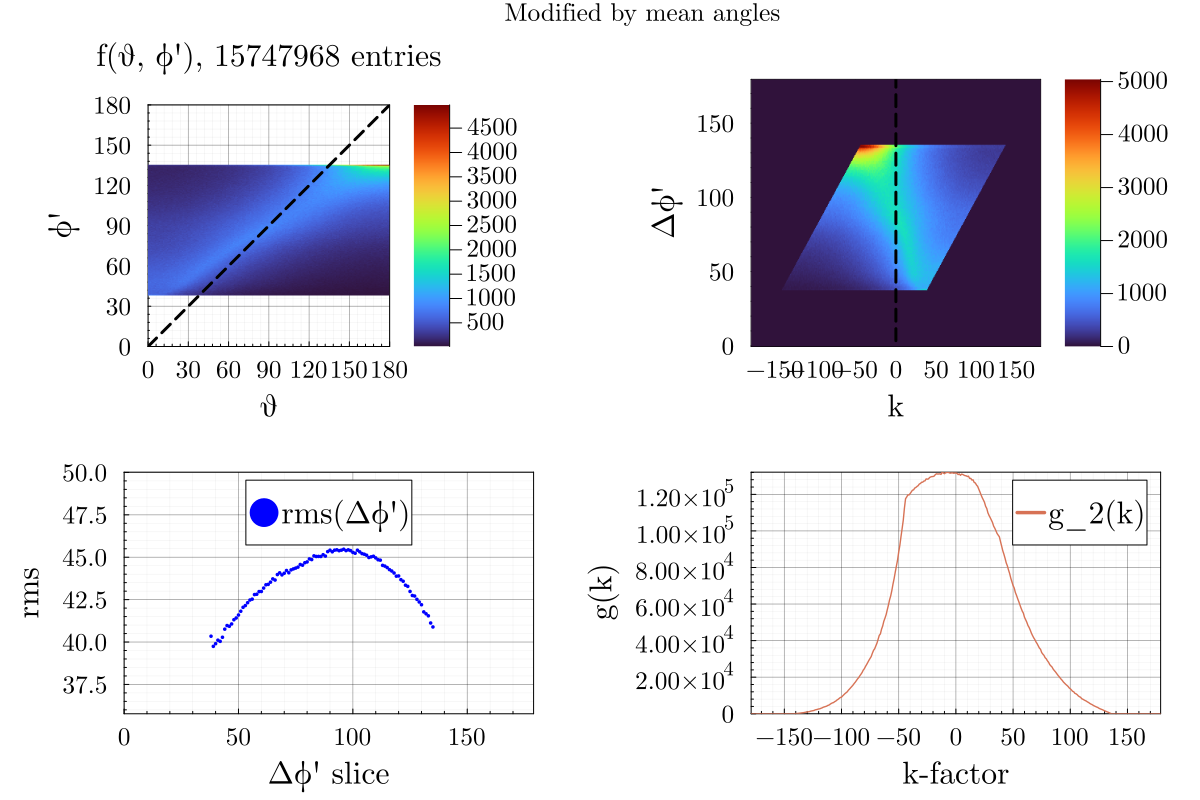

In [52]:
hm2 = Plots.heatmap(xRange, yRange,  matG2, ylabel ="Δϕ'", xlabel ="k", c =:turbo )
vline!([0], label ="", c = :black, lw = 3, s=:dash)

rms2 = [ get_rms(dfG2[:,i], dfG2[:,1]) for i in 2:ncol(dfG2) ]
yMin = 0.9*minimum(filter(x -> x .> 0, rms2)) # get the minimum rms value, excluding 0
yMax = 1.1*maximum(filter(x -> x .> 0, rms2))

sct2 = scatter( xPts, rms2, label ="rms(Δϕ')", ms=2, 
                legend=:top, xlabel ="Δϕ' slice", c =:blue,
                ylabel ="rms", ylims = (yMin, yMax) )

fh2d2 = Hist2D((modTree2.thetaEmitted, modTree2.thetaEscaped),
    Weights(modTree2.weights),
    (minAngle:dEmitted:maxAngle, minAngle:dEmitted:maxAngle))
gs2 = get_diagonal_sums(fh2d2)
ks2 = get_k_factors(fh2d2);

gk2 = plot(ks2 .* dEmitted, gs2, legend=:topright, xlims=(-179, 179), 
            xlabel="k-factor", ylabel="g(k)", label="g_2(k)")



plot(h2d2, hm2, sct2, gk2, layout = @layout[a b; c d] , size = (1200, 800), 
    plot_title= "Modified by mean angles")

In [53]:
rmsTotalUnModded = round(get_rms(gs1, ks1 .* dEmitted ), digits = 2)

46.99

In [54]:
rmsTotalModded = round(get_rms(gs2, ks2 .* dEmitted ), digits = 2)

43.85

Now we compare the four $RMS$ figures together. 

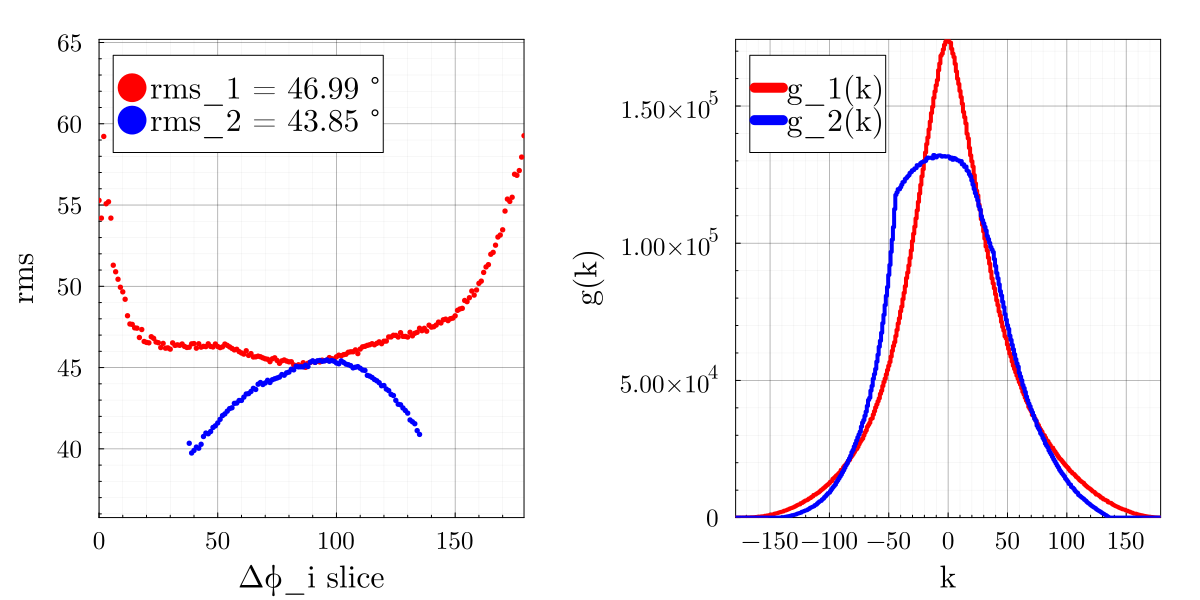

In [55]:
scComp2 = scatter( [xPts xPts], [rms1 rms2],  label =["rms_1 = $rmsTotalUnModded °" "rms_2 = $rmsTotalModded °"], 
        ms=3, c = [:red :blue], bottom_margin = 8Plots.mm,
        legend=:topleft, xlabel ="Δϕ_i slice", ylabel ="rms", ylims = (yMin, 1.1*maximum(rms1)))

gkComp2 = plot( [ks1 .* dEmitted, ks2 .* dEmitted], [gs1, gs2], label = ["g_1(k)" "g_2(k)"], legend = :topleft,
                xlabel = "k", ylabel = "g(k)", seriestype = :stepmid, lw = 4, c = [:red :blue])

plot(scComp2, gkComp2, size = (1200, 600))

We can see that shifting by mean value results in reduced $RMS$, the goal is achieved. 

## Finally, we can now provide a function, which as an input takes the measured angle $\phi$ and as an output provides $\phi'$ (the most likely $\theta$): **$\phi'(\phi)$**.

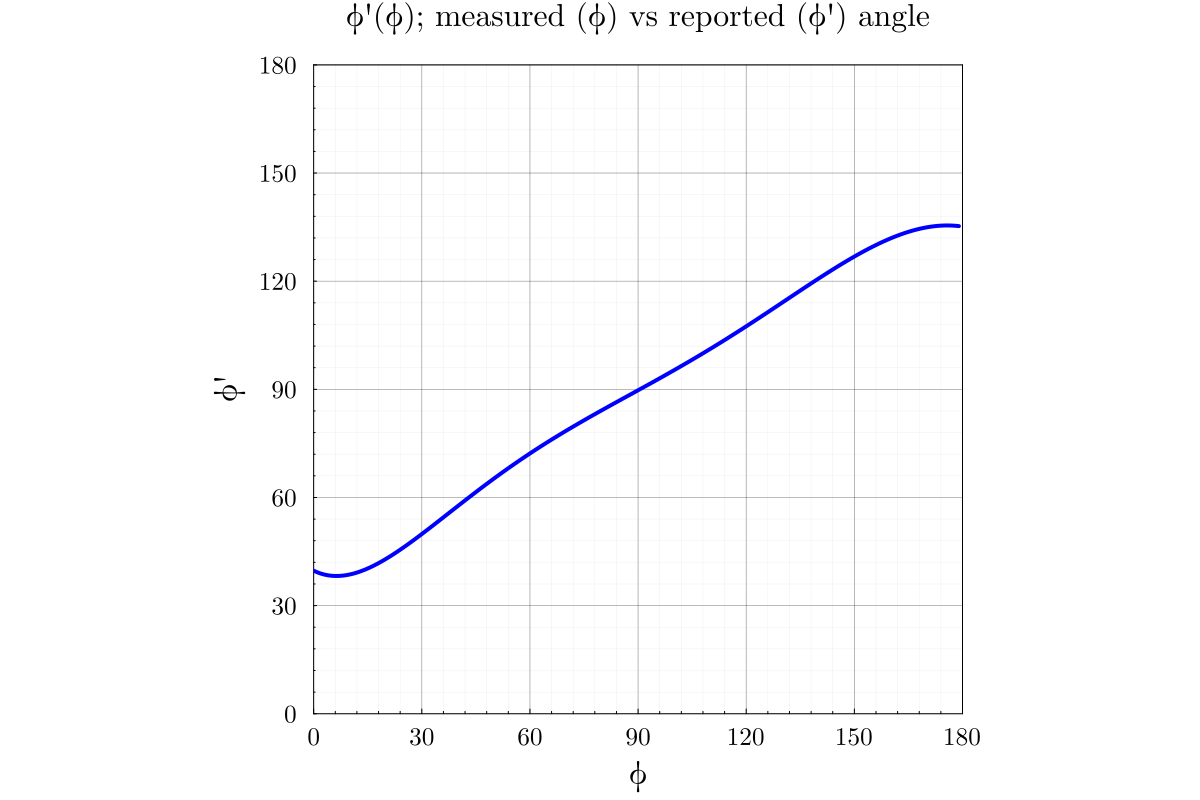

In [56]:
plot(
    xPts, xPts .+ f1.(xPts), lims = (0,180), lw = 4, c= :blue, 
    label ="", xlabel = "ϕ", ylabel ="ϕ'", aspect_ratio = 1, 
    title = "ϕ'(ϕ); measured (ϕ) vs reported (ϕ') angle"
)


In [57]:
f3 = Polynomials.fit(xPts,  res_medians, 6 )


Polynomial(25.24418686989242 - 1.5427483336106147*x + 0.05066335472661147*x^2 - 0.0007978100772597516*x^3 + 6.039729539466307e-6*x^4 - 2.1280060419822962e-8*x^5 + 2.684153760896262e-11*x^6)

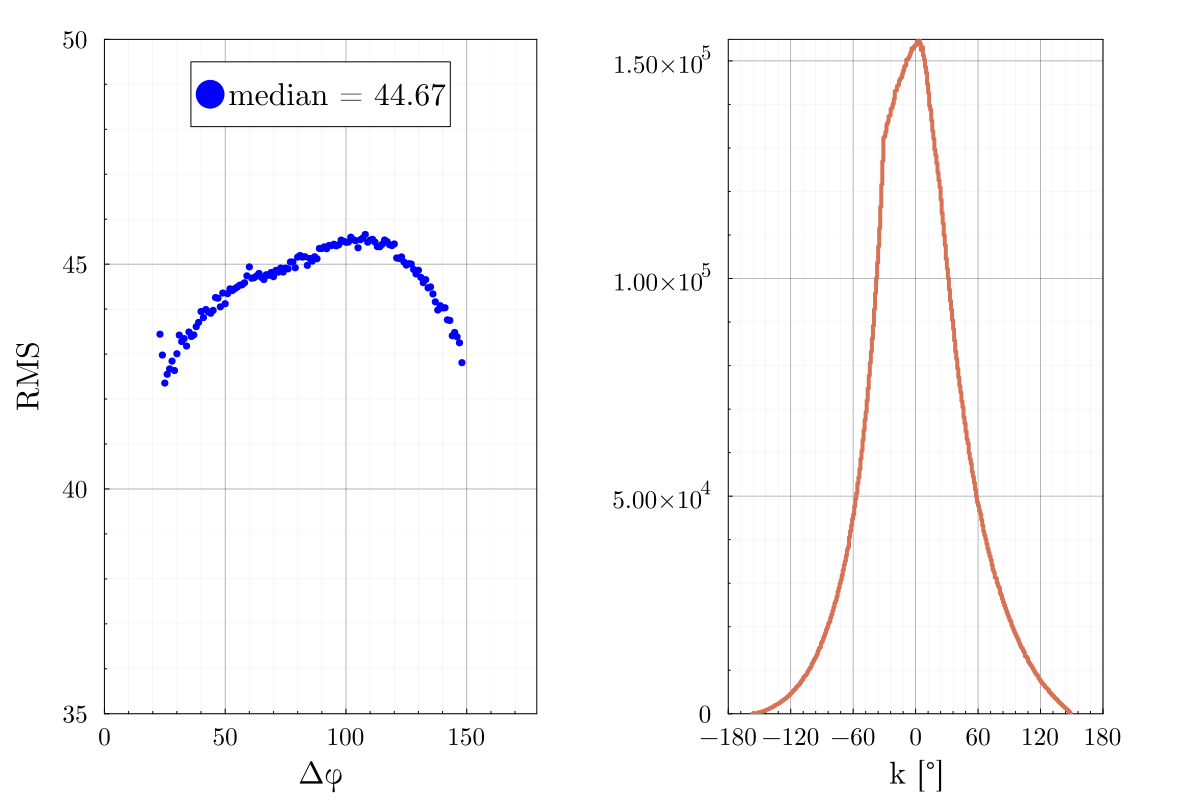

In [58]:
modTree3 = @chain tree begin
    @select(:thetaEmitted, :thetaEscaped, :weights)
    @rtransform :bin =  get_bin_center(:thetaEscaped, Int(180/dϕ))  # create a vector of bin centers (which bin ϕ falls inside)
    @transform :thetaEscapedOld = :thetaEscaped                     # create a copy of the old ϕ (for comparison only)

    @rtransform :thetaEscapedDisc = :thetaEscapedOld + res_medians[Int(ceil(:bin/dϕ))] # shift ϕ by s: ϕ' = ϕ + s 
    @rtransform :thetaEscaped = :thetaEscapedOld + f3(:thetaEscapedOld) # shift ϕ by s: ϕ' = ϕ + s 
    @subset( 0 .< :thetaEscaped .< 180) # keep only physical angles
end
        
dfG3 = get_gs_df(modTree3, dϕ, sign)
matG3 = df_to_mat(dfG3);
        
fh2d3 = Hist2D(
    (modTree3.thetaEmitted, modTree3.thetaEscaped),
    Weights(modTree3.weights),
    (minAngle:dEmitted:maxAngle, minAngle:dEmitted:maxAngle)
)
gs3 = get_diagonal_sums(fh2d3)
ks3 = get_k_factors(fh2d3);
        
   
rms3 = [ get_rms(dfG3[:,i], dfG3[:,1]) for i in 2:ncol(dfG3) ]
rmsTotalModdedMedian = round(get_rms(gs3, ks3 .* dEmitted ), digits = 2)

sct3 = scatter( xPts, rms3, label ="median = $rmsTotalModdedMedian", ms=4, 
                legend=:top, xlabel ="Δφ", c =:blue,
                ylabel ="RMS", ylims = (35, 50))


difs3= modTree3.thetaEscaped .- modTree3.thetaEmitted
        
gk3 = stephist(difs3, 
        nbins  = Int(180/dϕ*2+1), 
        lw     = 4, 
        label  = "",#"\nE ∈ ($e, $e2)keV \nrms = $rms °\n",
        legend =:outertopright, 
        xlims  = (-180,180), 
        xlabel = "k [°]",
        xticks = -180:60:180,
    )


plot(sct3, gk3)

In [59]:
f4 = Polynomials.fit(xPts,  res_modes, 6 )

Polynomial(2.6882730530970895 - 1.07347608643521*x + 0.051407611977673254*x^2 - 0.0009174265603297011*x^3 + 7.148368877303873e-6*x^4 - 2.237150779127616e-8*x^5 + 1.730405832968527e-11*x^6)

In [60]:
modTree4 = @chain tree begin
    @select(:thetaEmitted, :thetaEscaped, :weights)
    @rtransform :bin =  get_bin_center(:thetaEscaped, Int(180/dϕ))  # create a vector of bin centers (which bin ϕ falls inside)
    @transform :thetaEscapedOld = :thetaEscaped                     # create a copy of the old ϕ (for comparison only)

    @rtransform :thetaEscapedDisc = :thetaEscapedOld + res_modes[Int(ceil(:bin/dϕ))] # shift ϕ by s: ϕ' = ϕ + s 
    @rtransform :thetaEscaped = :thetaEscapedOld + f4(:thetaEscapedOld) # shift ϕ by s: ϕ' = ϕ + s 
    @subset( 0 .< :thetaEscaped .< 180) # keep only physical angles
end
        
dfG4 = get_gs_df(modTree4, dϕ, sign)
matG4 = df_to_mat(dfG4);
        
fh2d4 = Hist2D(
    (modTree4.thetaEmitted, modTree4.thetaEscaped),
    Weights(modTree4.weights),
    (minAngle:dEmitted:maxAngle, minAngle:dEmitted:maxAngle)
)
gs4 = get_diagonal_sums(fh2d4)
ks4 = get_k_factors(fh2d4);
        
   
rms4 = [ get_rms(dfG4[:,i], dfG4[:,1]) for i in 2:ncol(dfG4) ]
rmsTotalModdedMode = round(get_rms(gs4, ks4 .* dEmitted ), digits = 2)

# sct4 = scatter( xPts, rms4, label ="mode = $rmsTotalModdedMode", ms=4, 
#                 legend=:top, xlabel ="Δφ", c =:blue,
#                 ylabel ="RMS", ylims = (35, 50))


difs4= modTree4.thetaEscaped .- modTree4.thetaEmitted
        
# gk4 = stephist(difs4, 
#         nbins  = Int(180/dϕ*2+1), 
#         lw     = 4, 
#         label  = "",#"\nE ∈ ($e, $e2)keV \nrms = $rms °\n",
#         legend =:outertopright, 
#         xlims  = (-180,180), 
#         xlabel = "k [°]",
#         xticks = -180:60:180,
#     )


# plot(sct3, gk3)

15246299-element Vector{Float64}:
   4.943167746712902
  58.09236772585649
  -0.7991029815313198
 106.46426753570613
  42.909811741248745
 -87.27188276753785
 -52.17111881978633
  28.35353311480963
   ⋮
  68.08836747162275
  28.015681529390065
 -31.00598869853995
 -12.202997366845523
  58.513380707643016
   1.2299707238272504
 -38.56586848133381

In [127]:
r1 = filter(x -> x!=0, rms1)
r2 = replace(rms2, 0=> NaN)
r3 = replace(rms3, 0=> NaN)
r4 = replace(rms4, 0=> NaN)

180-element Vector{Float64}:
 NaN
 NaN
  55.57811368648136
  55.832548914454854
  52.52744088271095
  52.56031804775105
  51.923307841741725
  51.63642102984284
   ⋮
  60.437525586088256
  60.792053641066985
  60.952406992847415
  61.08186356545118
  61.060288062864004
  61.262648614633825
  61.563677620502126

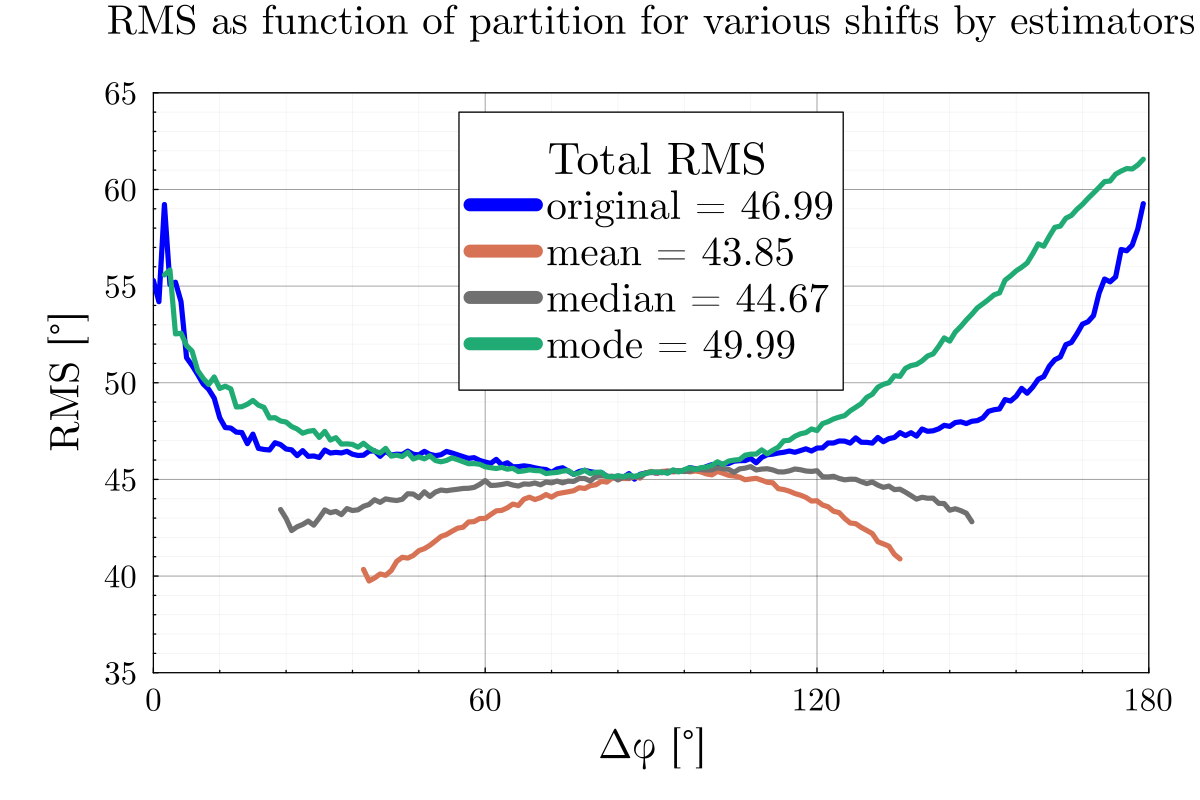

In [133]:
plot( xPts, [r1 r2 r3 r4], ylims = (35, 65), legendtitle = "Total RMS", legendtitlefontsize = 22, legend =:top,
label = ["original = $rmsTotalUnModded" "mean = $rmsTotalModded" "median = $rmsTotalModdedMedian" "mode = $rmsTotalModdedMode"],
lw = 4, c = [:blue 1 3 4], thickness_scaling = 1.3,
title = "RMS as function of partition for various shifts by estimators", xlabel ="Δφ [°]", ylabel = "RMS [°]", xlims = (0,180), xticks = 0:60:180)

In [134]:
savefig("Figs/RMS_per_partition.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/RMS_per_partition.pdf"

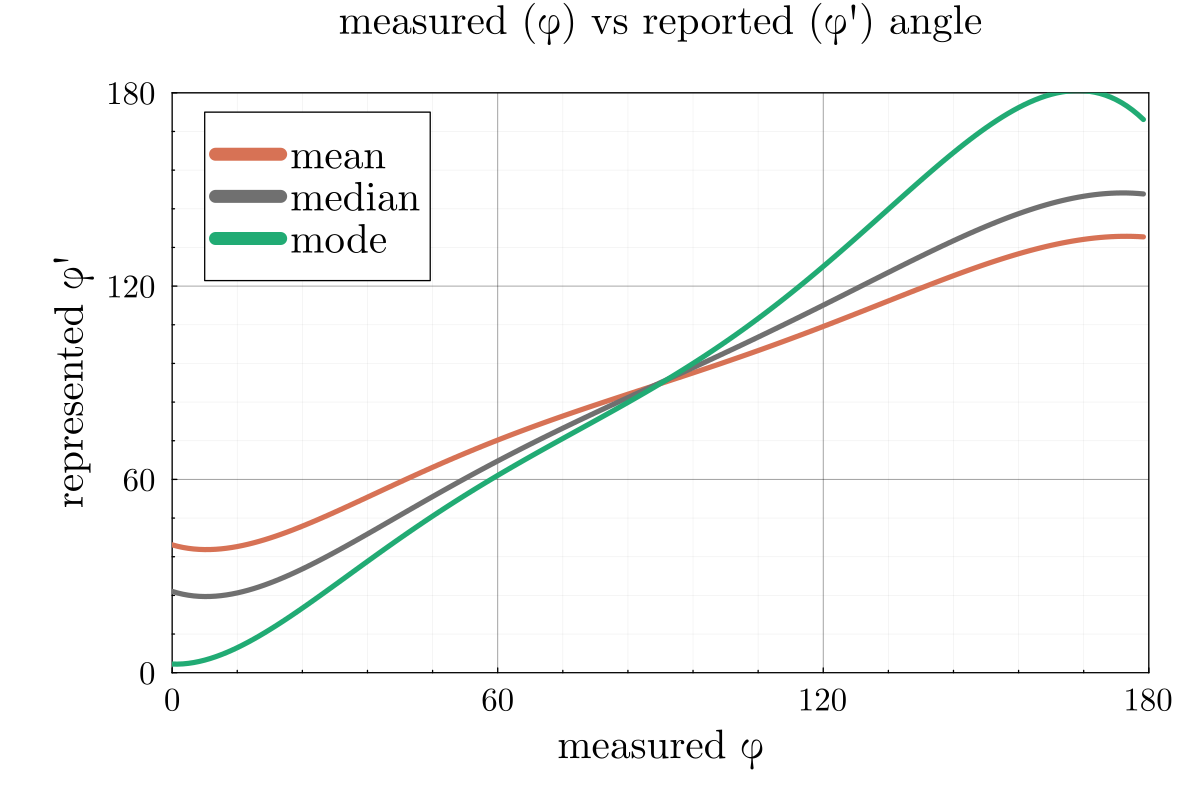

In [135]:
plot(
    xPts, xPts .+ f2.(xPts), lims = (0,180), lw = 4, c= 1, label = "mean"
)

plot!(
    xPts, xPts .+ f3.(xPts), lims = (0,180), lw = 4, c= 3, label ="median"
)
plot!(
    xPts, xPts .+ f4.(xPts), lims = (0,180), ticks = 0:60:180, lw = 4, c= 4, label ="mode", 
    xlabel = "measured φ", ylabel ="represented φ'", 
    title = "measured (φ) vs reported (φ') angle", thickness_scaling = 1.3
)

In [136]:
savefig("Figs/represented_vs_measured_estimators.pdf")

"/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/Figs/represented_vs_measured_estimators.pdf"